STEP 1: LOAD & EXPLORE COURSERA DATASET

[1] Loading dataset...
✓ Dataset loaded successfully!

[2] Dataset Basic Information:
   Shape: 891 rows × 7 columns

   Column Names:
      1. Unnamed: 0
      2. course_title
      3. course_organization
      4. course_Certificate_type
      5. course_rating
      6. course_difficulty
      7. course_students_enrolled

   Data Types:
Unnamed: 0                    int64
course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

[3] First 5 Rows:
   Unnamed: 0                                       course_title  \
0         134  (ISC)² Systems Security Certified Practitioner...   
1         743  A Crash Course in Causality:  Inferring Causal...   
2         874                     A Crash Course in Data Science   
3         413                            A Law Student's Toolki

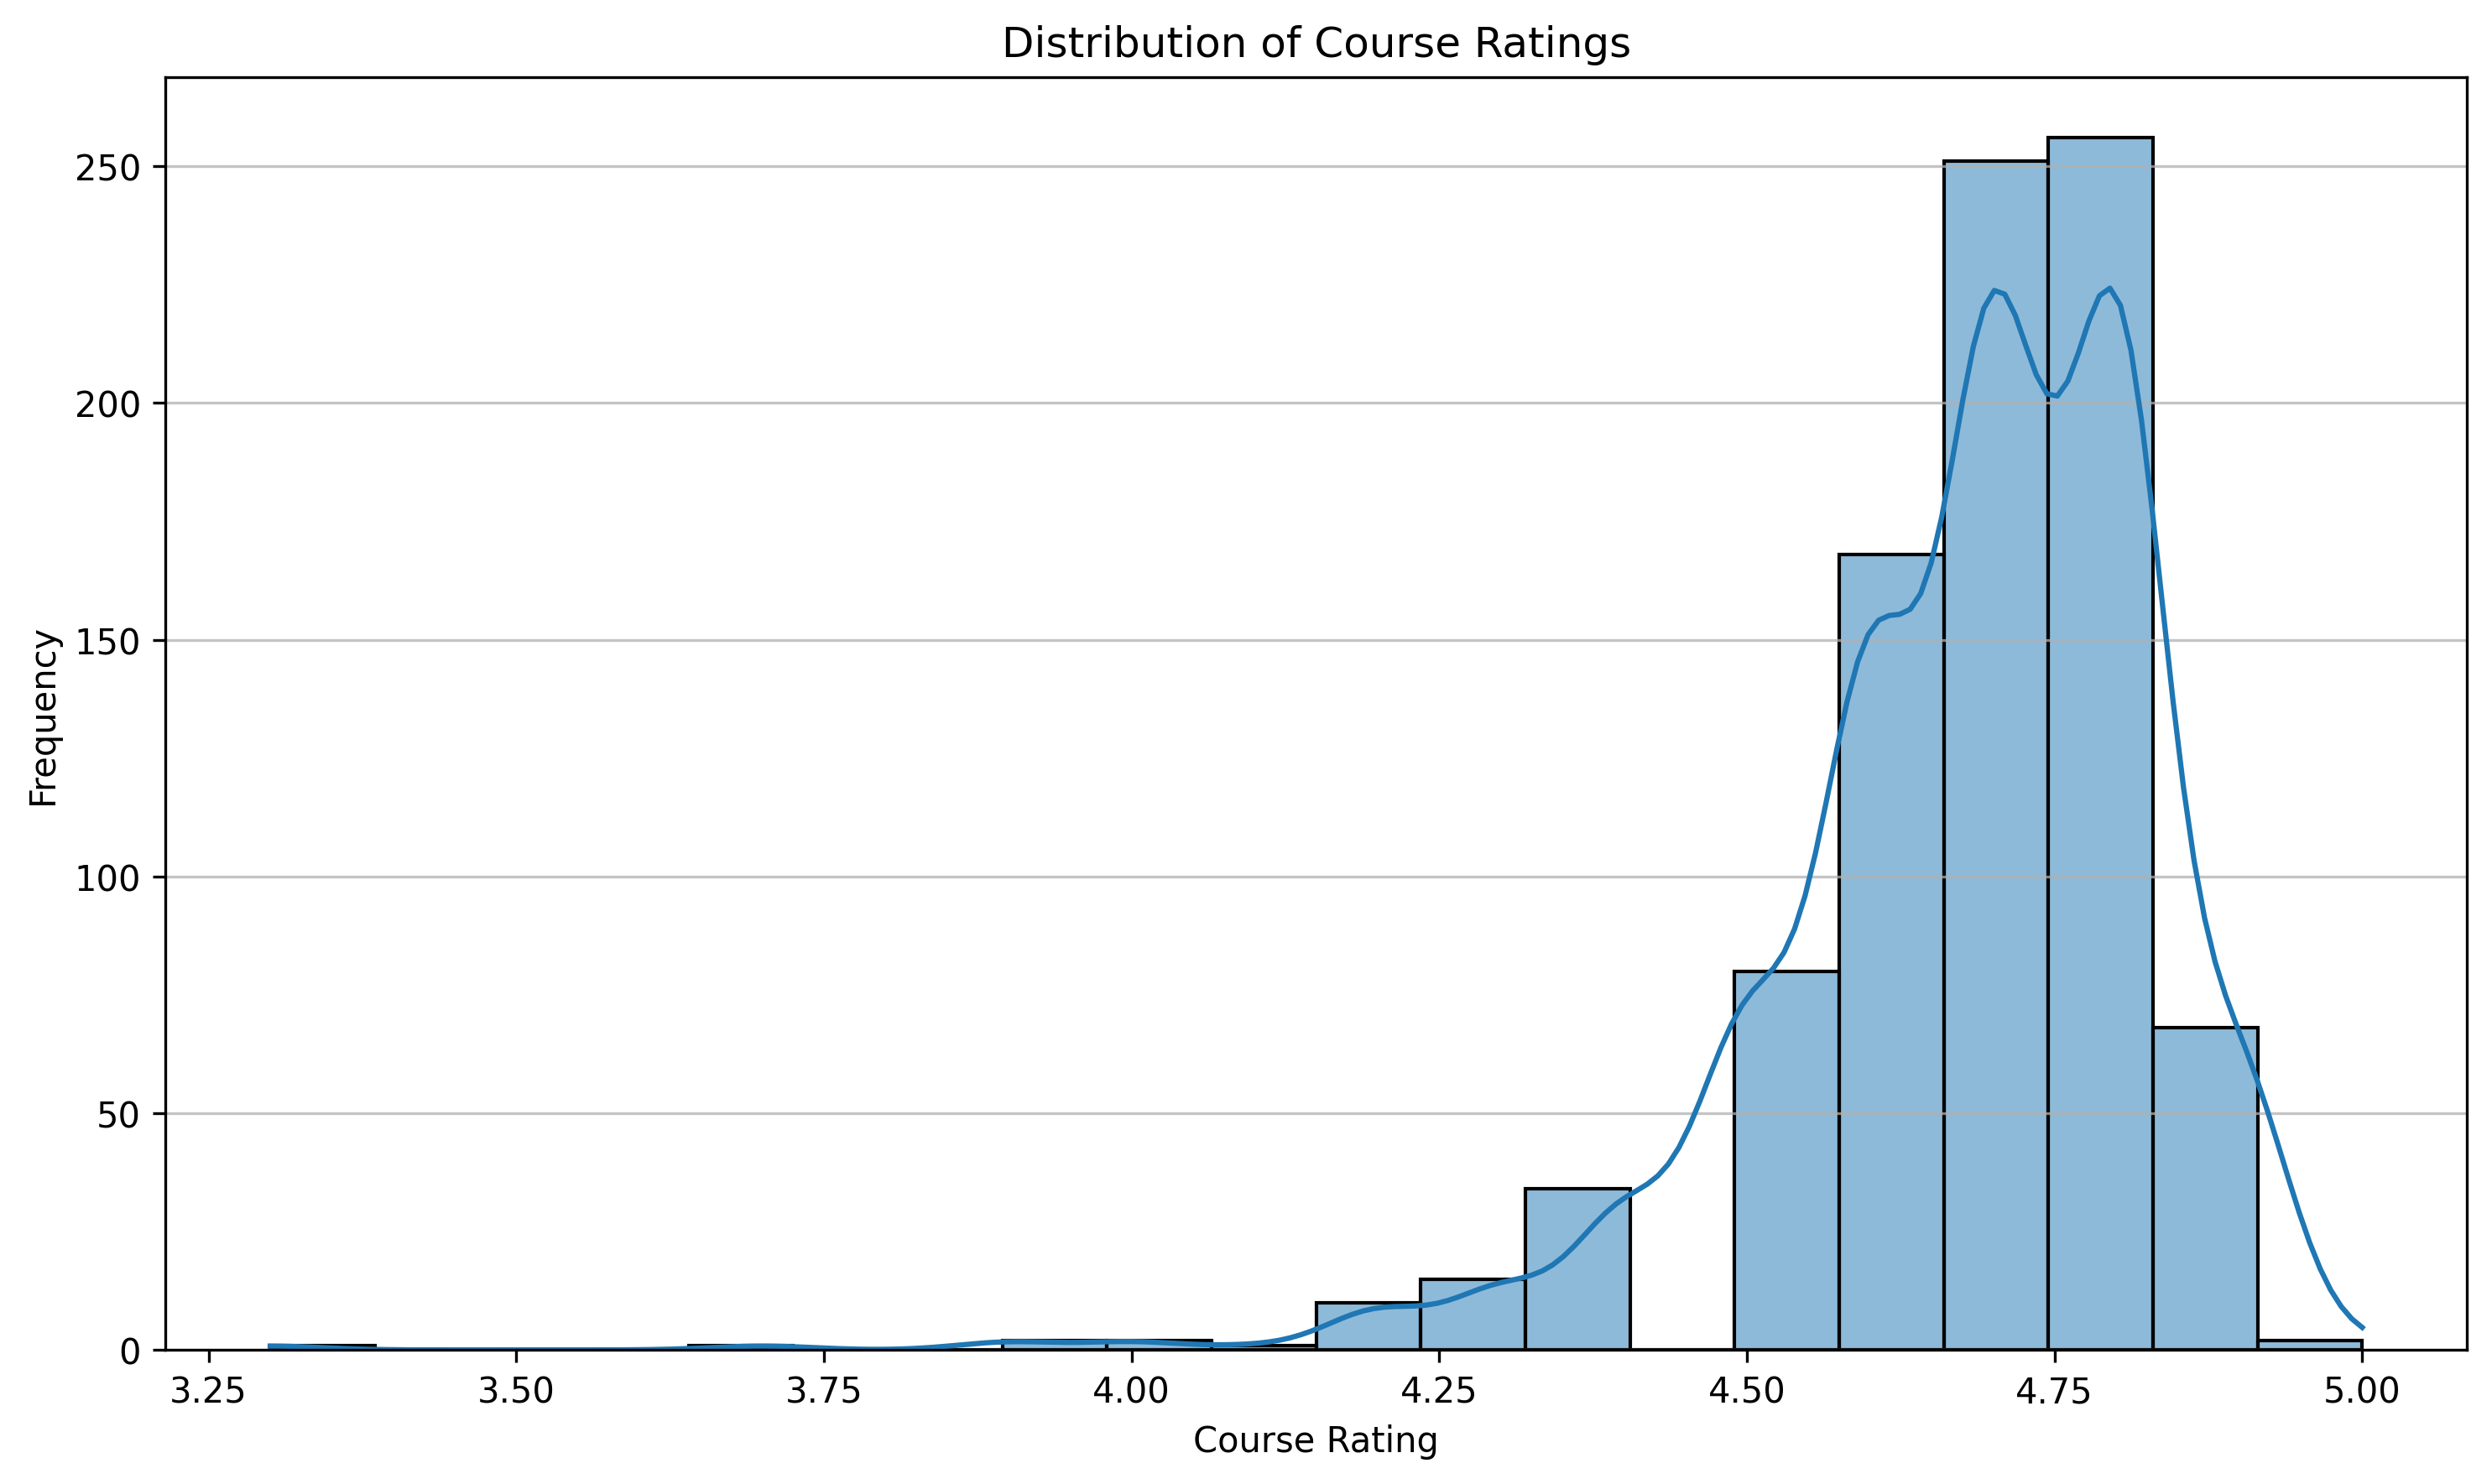

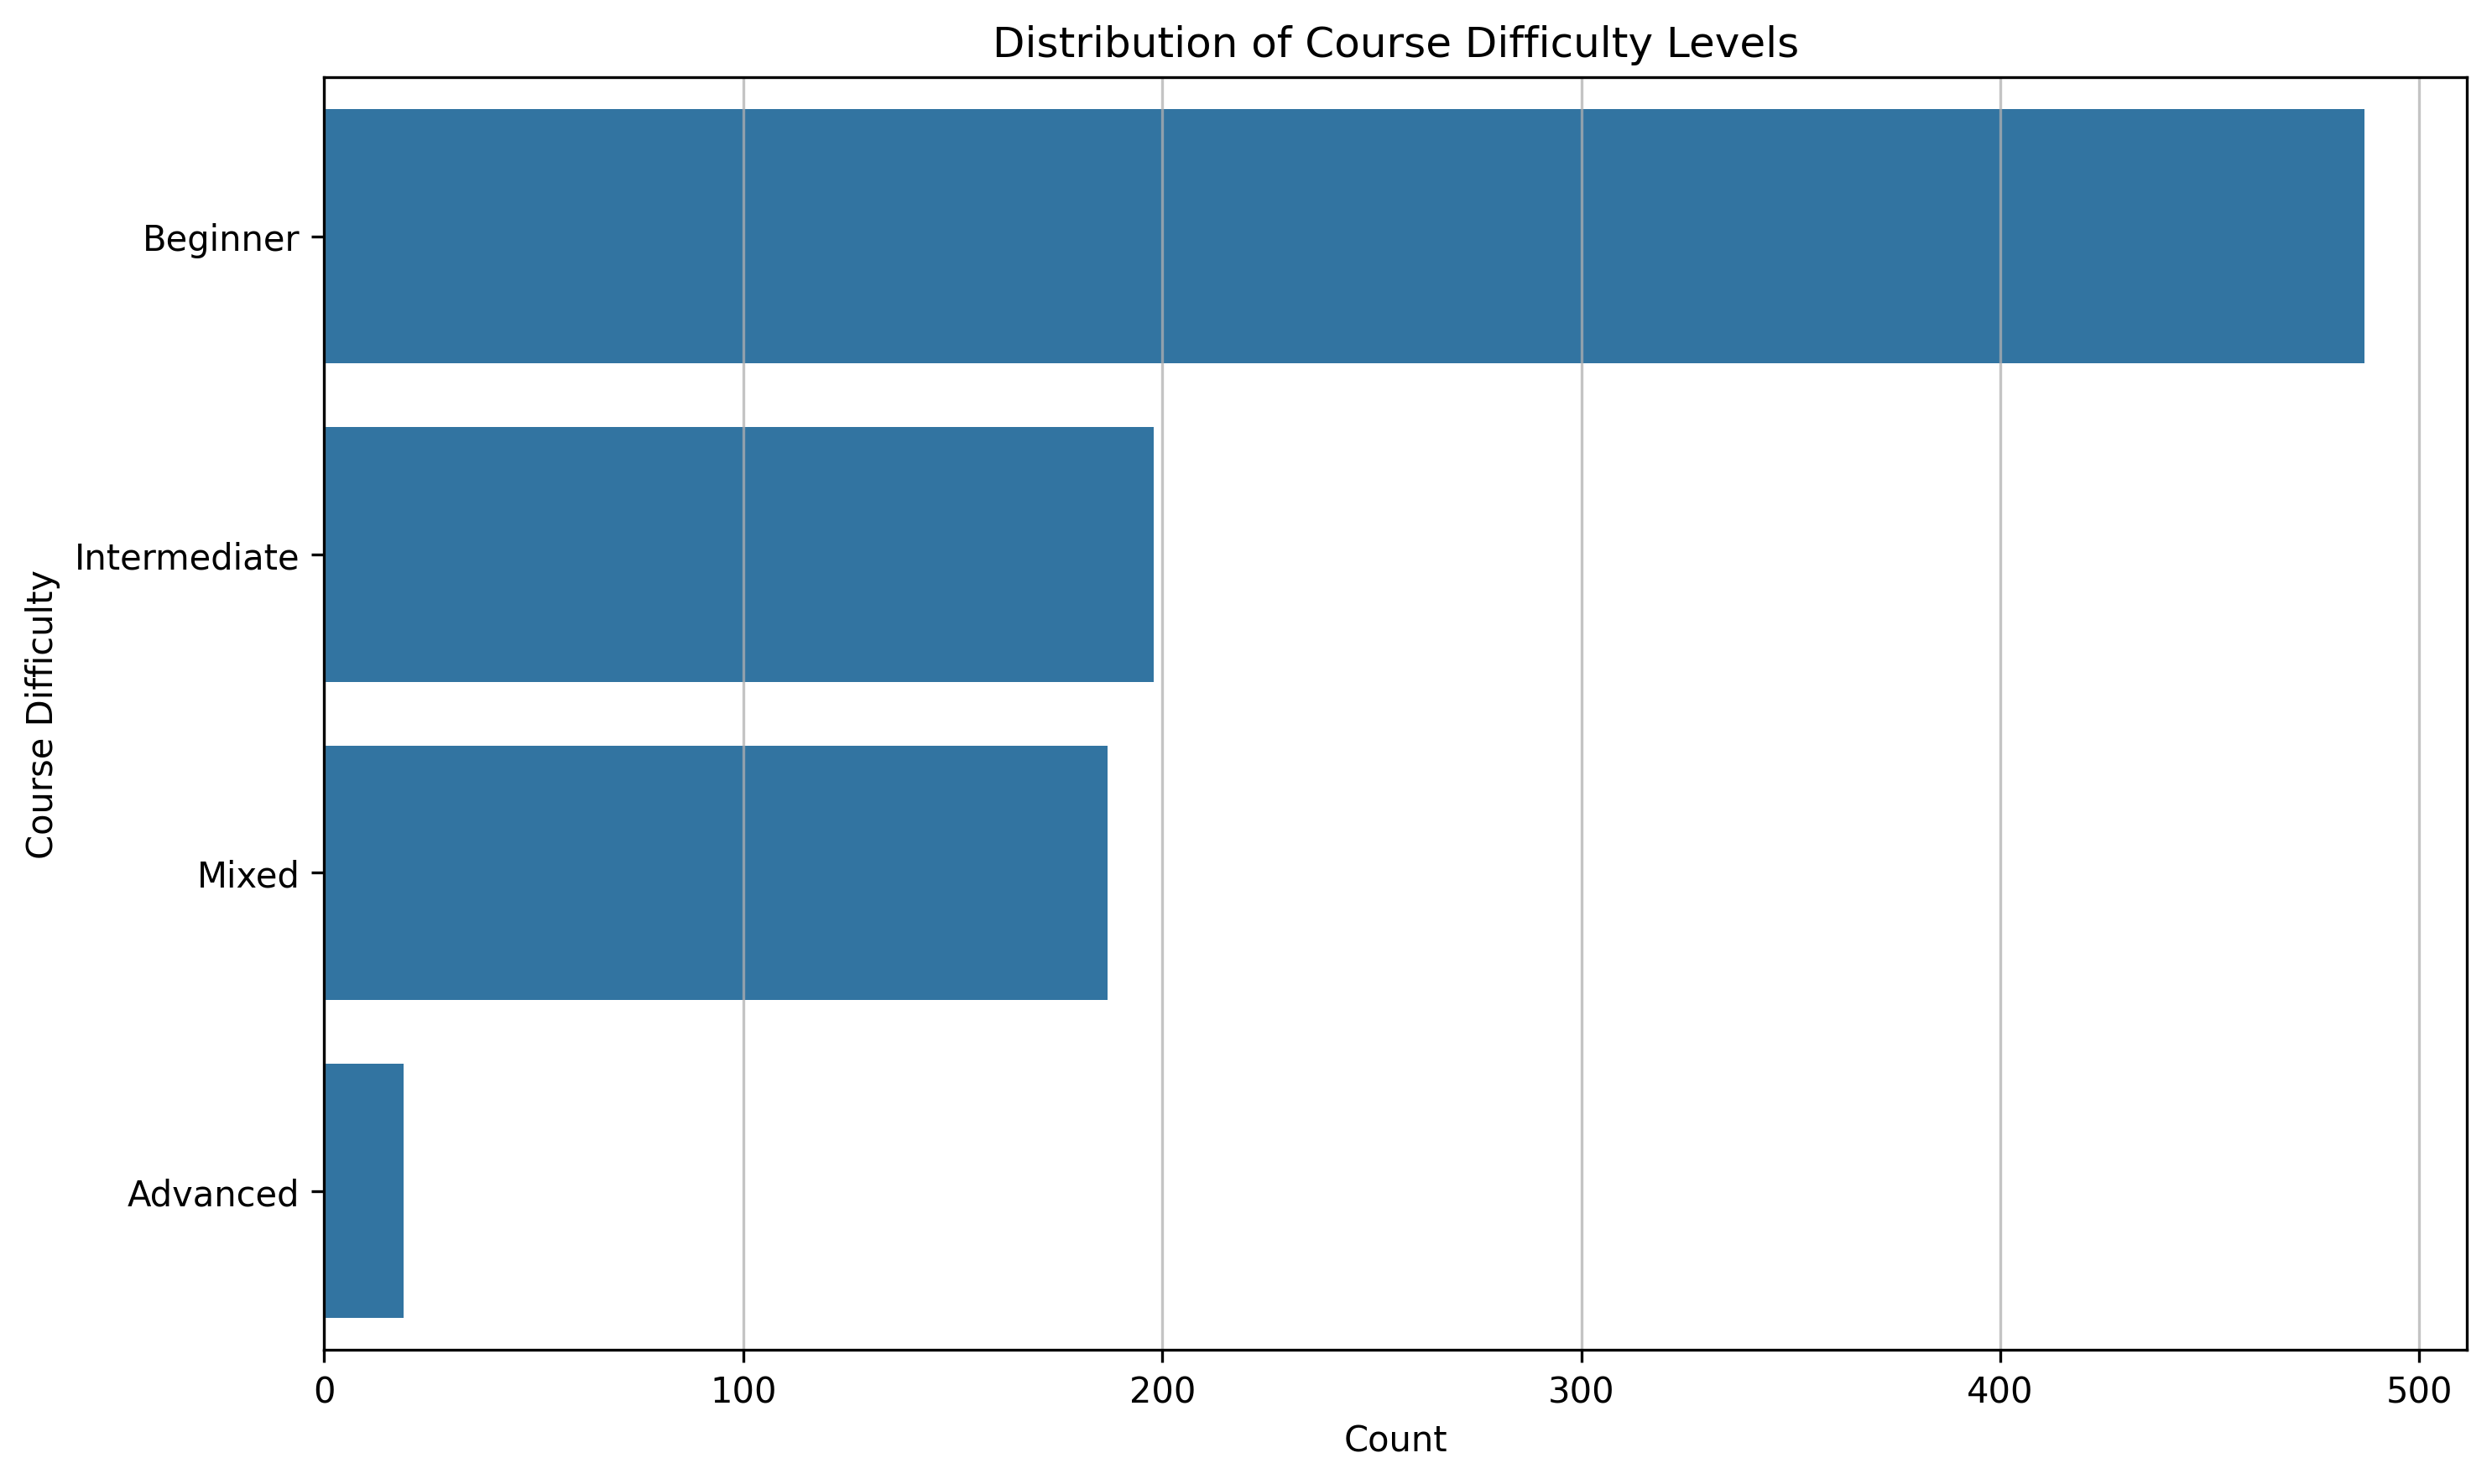


✓ Visualizations generated successfully!

[9] Saving dataset info for next steps...

✓ Dataset ready for exploration!


In [9]:
# STEP 1: LOAD & EXPLORE COURSERA DATASET
# Capstone Project: Personalized Online Course Recommender System

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# ===== DEFINE PATHS =====
DATASET_PATH = r'D:\coursera-assigment\coursera_dataset\coursera_dataset.csv'
RESULT_PATH = r'D:\coursera-assigment\Course 6 - Capstone\result'

# Create result folder if it doesn't exist
os.makedirs(RESULT_PATH, exist_ok=True)

print("="*80)
print("STEP 1: LOAD & EXPLORE COURSERA DATASET")
print("="*80)

# ===== LOAD DATA =====
print("\n[1] Loading dataset...")
df = pd.read_csv(DATASET_PATH)
print(f"✓ Dataset loaded successfully!")

# ===== BASIC INFO =====
print("\n[2] Dataset Basic Information:")
print(f"   Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n   Column Names:")
for i, col in enumerate(df.columns, 1):
    print(f"      {i}. {col}")

print(f"\n   Data Types:")
print(df.dtypes)

# ===== FIRST FEW ROWS =====
print(f"\n[3] First 5 Rows:")
print(df.head())

# ===== MISSING VALUES =====
print(f"\n[4] Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "   No missing values!")

# ===== STATISTICAL SUMMARY =====
print(f"\n[5] Statistical Summary:")
print(df.describe())

# ===== UNIQUE VALUES =====
print(f"\n[6] Unique Values per Column:")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"   {col}: {unique_count} unique values")

# ===== DATASET QUALITY CHECK =====
print(f"\n[7] Data Quality Check:")
print(f"   Total records: {len(df)}")
print(f"   Duplicate rows: {df.duplicated().sum()}")
print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# ===== DATA VISUALIZATION =====
print(f"\n[8] Data Visualizations:")

# Distribution of Course Ratings
plt.figure(figsize=(10, 6), dpi=300)
sns.histplot(df['course_rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Course Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig(os.path.join(RESULT_PATH, 'step1_course_ratings_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

# Distribution of Course Difficulty Levels
plt.figure(figsize=(10, 6), dpi=300)
sns.countplot(y='course_difficulty', data=df, order=df['course_difficulty'].value_counts().index)
plt.title('Distribution of Course Difficulty Levels')
plt.xlabel('Count')
plt.ylabel('Course Difficulty')
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.savefig(os.path.join(RESULT_PATH, 'step1_course_difficulty_distribution.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Visualizations generated successfully!")

# ===== SAVE BASIC INFO =====
print("\n[9] Saving dataset info for next steps...")
print(f"\n✓ Dataset ready for exploration!")
print("="*80)

STEP 2: EXPLORATORY DATA ANALYSIS (EDA)

[1] Course Counts per Organization (Top 15)...
✓ eda_1_course_counts_org.png saved


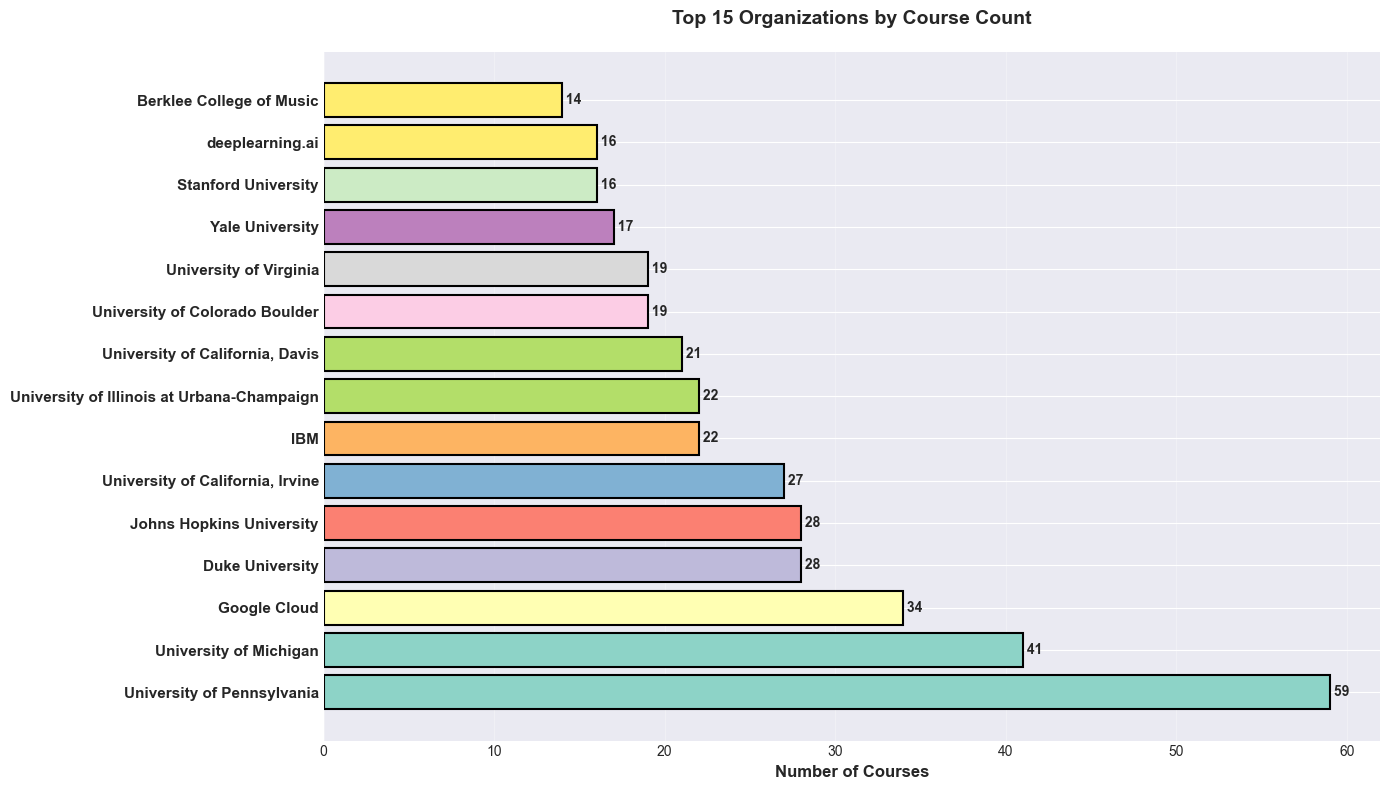


[2] Course Enrollment Distribution...
✓ eda_2_enrollment_distribution.png saved


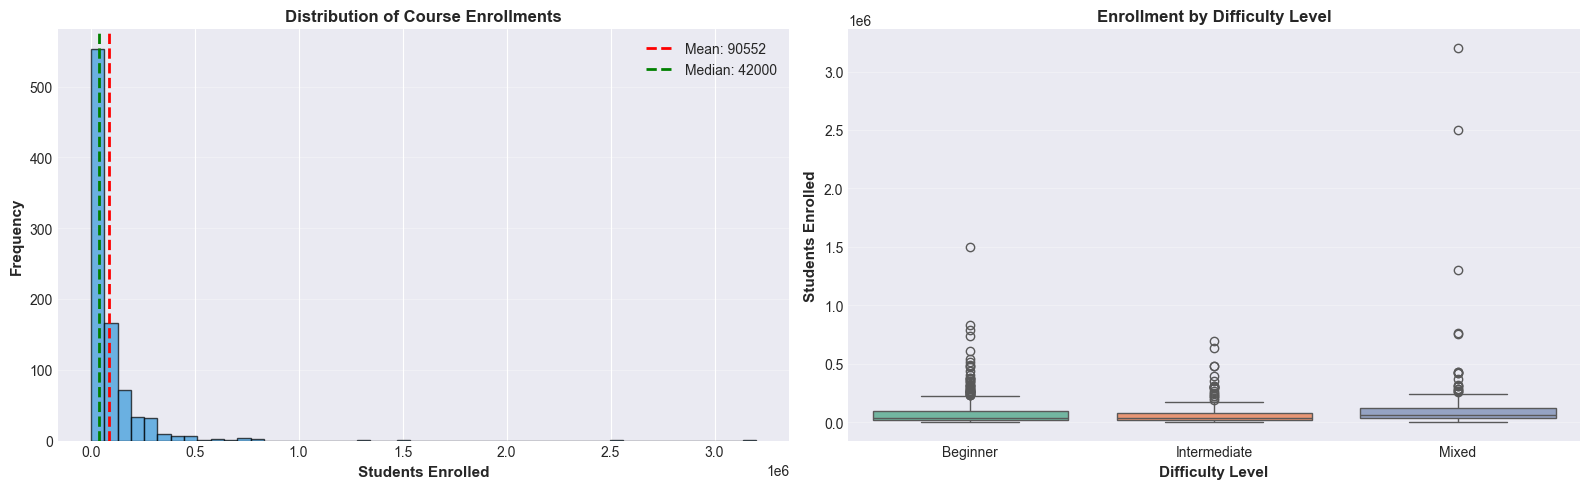


[3] Course Rating Distribution...
✓ eda_3_rating_distribution.png saved


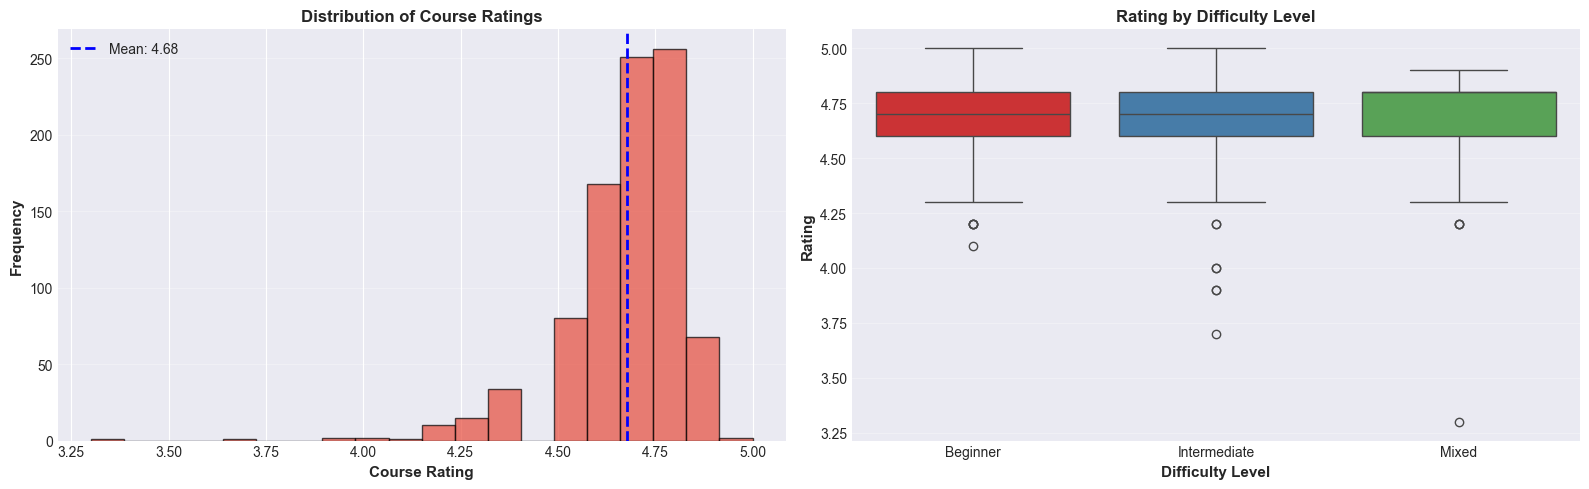


[4] Certificate Type Distribution...
✓ eda_4_certificate_distribution.png saved


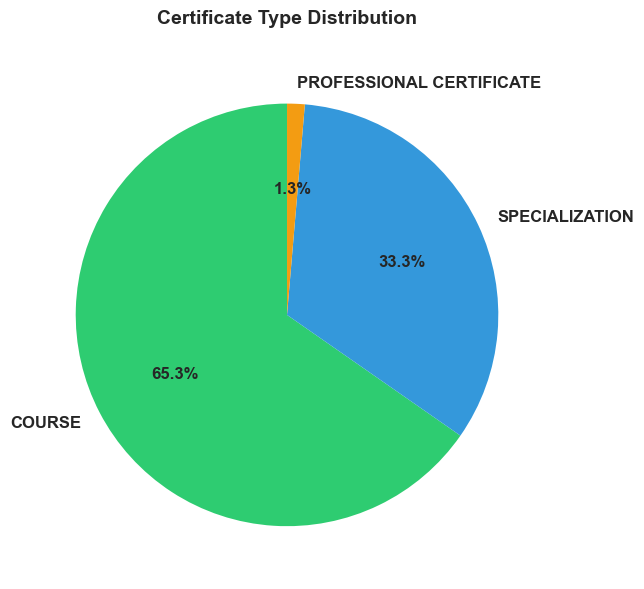


[5] Difficulty Level Distribution...
✓ eda_5_difficulty_distribution.png saved


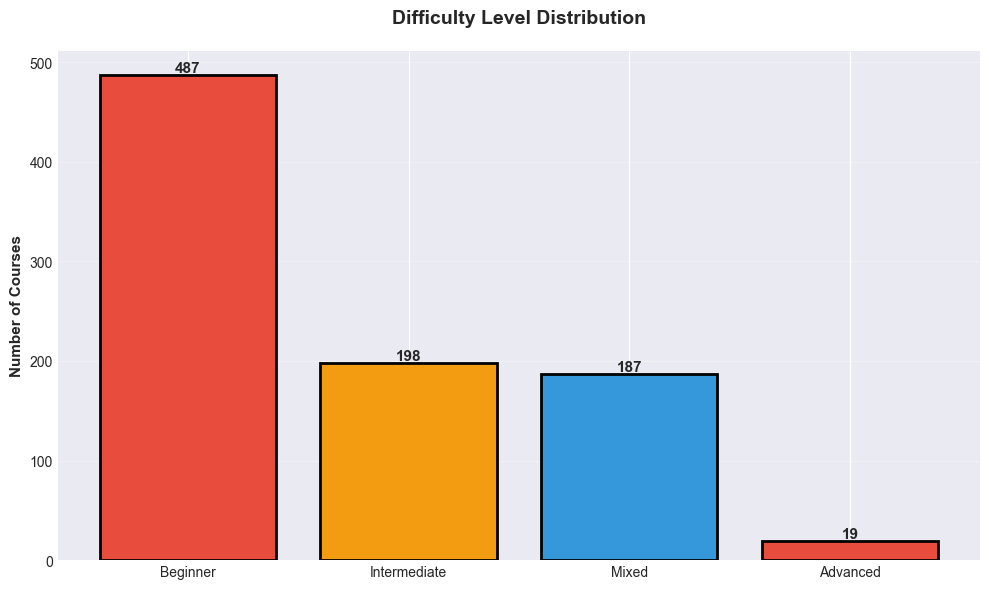


[6] Top 20 Most Popular Courses...

Top 20 Most Enrolled Courses:
                                               course_title  students_enrolled_clean  course_rating
1                                          Machine Learning                3200000.0            4.9
2                                 The Science of Well-Being                2500000.0            4.9
3                                      Python for Everybody                1500000.0            4.8
4   Programming for Everybody (Getting Started with Python)                1300000.0            4.8
5                                              Data Science                 830000.0            4.5
6                                            Career Success                 790000.0            4.4
7                            English for Career Development                 760000.0            4.8
8   Successful Negotiation: Essential Strategies and Skills                 750000.0            4.8
9                         Data Sc

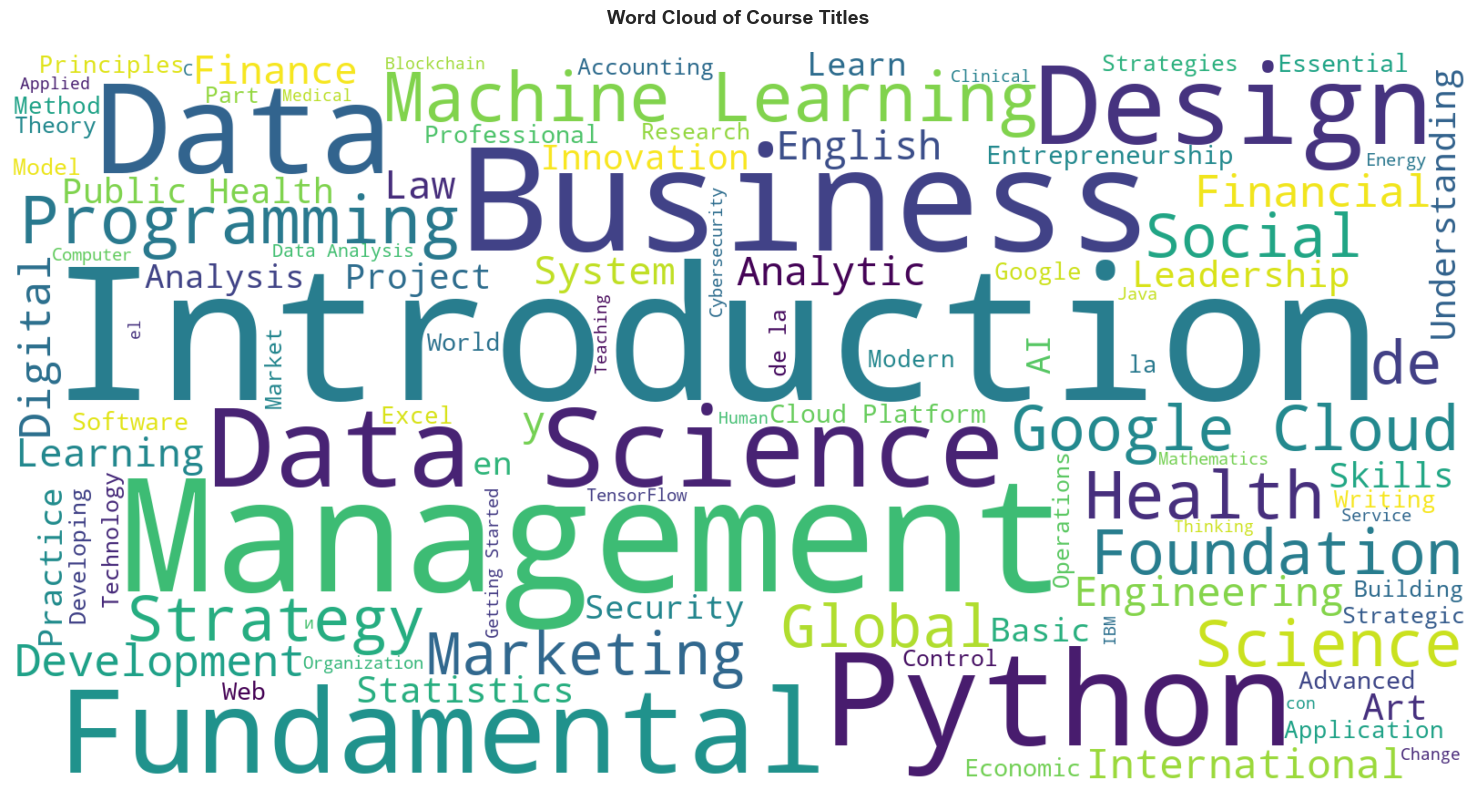


EDA SUMMARY STATISTICS

📊 Course Statistics:
   Total Courses: 891
   Organizations: 154
   Average Rating: 4.68/5.0
   Avg Students Enrolled: 90552
   Max Students Enrolled: 3200000
   Min Students Enrolled: 1500

📈 Enrollment by Difficulty:
   Beginner: 81975 avg students (487 courses)
   Intermediate: 73264 avg students (198 courses)
   Mixed: 133633 avg students (187 courses)

🏆 Rating by Certificate Type:
   SPECIALIZATION: 4.62 avg rating
   COURSE: 4.71 avg rating
   PROFESSIONAL CERTIFICATE: 4.70 avg rating

✓ EDA Complete!


In [10]:
# STEP 2: EXPLORATORY DATA ANALYSIS (EDA)
# Visualisasi dan analisis data untuk presentation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import warnings
warnings.filterwarnings('ignore')

# ===== DEFINE PATHS =====
DATASET_PATH = r'D:\coursera-assigment\coursera_dataset\coursera_dataset.csv'
RESULT_PATH = r'D:\coursera-assigment\Course 6 - Capstone\result'

# Create result folder if it doesn't exist
os.makedirs(RESULT_PATH, exist_ok=True)

# Load data
df = pd.read_csv(DATASET_PATH)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("="*80)
print("STEP 2: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*80)

# ===== 1. COURSE COUNTS PER ORGANIZATION =====
print("\n[1] Course Counts per Organization (Top 15)...")

fig, ax = plt.subplots(figsize=(14, 8))
top_orgs = df['course_organization'].value_counts().head(15)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_orgs)))
bars = ax.barh(range(len(top_orgs)), top_orgs.values, color=colors, edgecolor='black', linewidth=1.5)

ax.set_yticks(range(len(top_orgs)))
ax.set_yticklabels(top_orgs.index, fontsize=11, fontweight='bold')
ax.set_xlabel('Number of Courses', fontsize=12, fontweight='bold')
ax.set_title('Top 15 Organizations by Course Count', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_orgs.values)):
    ax.text(val, i, f' {val}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(RESULT_PATH, 'eda_1_course_counts_org.png'), dpi=300, bbox_inches='tight')
print("✓ eda_1_course_counts_org.png saved")
plt.show()

# ===== 2. ENROLLMENT DISTRIBUTION =====
print("\n[2] Course Enrollment Distribution...")

# Clean enrollment data
def parse_enrollment(s):
    s = str(s).strip().lower()
    if 'k' in s:
        return float(s.replace('k', '')) * 1000
    elif 'm' in s:
        return float(s.replace('m', '')) * 1000000
    else:
        return float(s)
df['students_enrolled_clean'] = df['course_students_enrolled'].apply(parse_enrollment)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram
axes[0].hist(df['students_enrolled_clean'], bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].axvline(df['students_enrolled_clean'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["students_enrolled_clean"].mean():.0f}')
axes[0].axvline(df['students_enrolled_clean'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["students_enrolled_clean"].median():.0f}')
axes[0].set_xlabel('Students Enrolled', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Course Enrollments', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Box plot by difficulty
difficulty_order = ['Beginner', 'Intermediate', 'Mixed']
df_sorted = df.copy()
df_sorted['course_difficulty'] = pd.Categorical(df_sorted['course_difficulty'], categories=difficulty_order, ordered=True)
df_sorted = df_sorted.sort_values('course_difficulty')

sns.boxplot(data=df_sorted, x='course_difficulty', y='students_enrolled_clean', ax=axes[1], palette='Set2')
axes[1].set_xlabel('Difficulty Level', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Students Enrolled', fontsize=11, fontweight='bold')
axes[1].set_title('Enrollment by Difficulty Level', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(RESULT_PATH, 'eda_2_enrollment_distribution.png'), dpi=300, bbox_inches='tight')
print("✓ eda_2_enrollment_distribution.png saved")
plt.show()

# ===== 3. COURSE RATING DISTRIBUTION =====
print("\n[3] Course Rating Distribution...")

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram of ratings
axes[0].hist(df['course_rating'], bins=20, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[0].axvline(df['course_rating'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["course_rating"].mean():.2f}')
axes[0].set_xlabel('Course Rating', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Course Ratings', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Rating by difficulty
difficulty_order = ['Beginner', 'Intermediate', 'Mixed']
df_sorted = df.copy()
df_sorted['course_difficulty'] = pd.Categorical(df_sorted['course_difficulty'], categories=difficulty_order, ordered=True)
df_sorted = df_sorted.sort_values('course_difficulty')

sns.boxplot(data=df_sorted, x='course_difficulty', y='course_rating', ax=axes[1], palette='Set1')
axes[1].set_xlabel('Difficulty Level', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Rating', fontsize=11, fontweight='bold')
axes[1].set_title('Rating by Difficulty Level', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(RESULT_PATH, 'eda_3_rating_distribution.png'), dpi=300, bbox_inches='tight')
print("✓ eda_3_rating_distribution.png saved")
plt.show()

# ===== 4. CERTIFICATE TYPE DISTRIBUTION =====
print("\n[4] Certificate Type Distribution...")

fig, ax = plt.subplots(figsize=(10, 6))
cert_counts = df['course_Certificate_type'].value_counts()
colors_cert = ['#2ecc71', '#3498db', '#f39c12']
wedges, texts, autotexts = ax.pie(cert_counts.values, labels=cert_counts.index, autopct='%1.1f%%',
                                    colors=colors_cert, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
ax.set_title('Certificate Type Distribution', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(os.path.join(RESULT_PATH, 'eda_4_certificate_distribution.png'), dpi=300, bbox_inches='tight')
print("✓ eda_4_certificate_distribution.png saved")
plt.show()

# ===== 5. DIFFICULTY LEVEL DISTRIBUTION =====
print("\n[5] Difficulty Level Distribution...")

fig, ax = plt.subplots(figsize=(10, 6))
diff_counts = df['course_difficulty'].value_counts()
colors_diff = ['#e74c3c', '#f39c12', '#3498db']
bars = ax.bar(diff_counts.index, diff_counts.values, color=colors_diff, edgecolor='black', linewidth=2)
ax.set_ylabel('Number of Courses', fontsize=11, fontweight='bold')
ax.set_title('Difficulty Level Distribution', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(RESULT_PATH, 'eda_5_difficulty_distribution.png'), dpi=300, bbox_inches='tight')
print("✓ eda_5_difficulty_distribution.png saved")
plt.show()

# ===== 6. TOP 20 MOST POPULAR COURSES =====
print("\n[6] Top 20 Most Popular Courses...")

top_20 = df.nlargest(20, 'students_enrolled_clean')[['course_title', 'students_enrolled_clean', 'course_rating']].reset_index(drop=True)
top_20.index = top_20.index + 1

print("\nTop 20 Most Enrolled Courses:")
print(top_20.to_string())

# Save to CSV
top_20.to_csv(os.path.join(RESULT_PATH, 'top_20_courses.csv'))
print("\n✓ top_20_courses.csv saved")

# ===== 7. WORD CLOUD OF COURSE TITLES =====
print("\n[7] Word Cloud of Course Titles...")

# Create word cloud
all_titles = ' '.join(df['course_title'].astype(str))
wordcloud = WordCloud(width=1600, height=800, background_color='white',
                      colormap='viridis', max_words=100).generate(all_titles)

fig, ax = plt.subplots(figsize=(16, 8))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
ax.set_title('Word Cloud of Course Titles', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig(os.path.join(RESULT_PATH, 'eda_6_wordcloud.png'), dpi=300, bbox_inches='tight')
print("✓ eda_6_wordcloud.png saved")
plt.show()

# ===== SUMMARY STATISTICS =====
print("\n" + "="*80)
print("EDA SUMMARY STATISTICS")
print("="*80)

print(f"\n📊 Course Statistics:")
print(f"   Total Courses: {len(df)}")
print(f"   Organizations: {df['course_organization'].nunique()}")
print(f"   Average Rating: {df['course_rating'].mean():.2f}/5.0")
print(f"   Avg Students Enrolled: {df['students_enrolled_clean'].mean():.0f}")
print(f"   Max Students Enrolled: {df['students_enrolled_clean'].max():.0f}")
print(f"   Min Students Enrolled: {df['students_enrolled_clean'].min():.0f}")

print(f"\n📈 Enrollment by Difficulty:")
for diff in ['Beginner', 'Intermediate', 'Mixed']:
    avg_enrollment = df[df['course_difficulty'] == diff]['students_enrolled_clean'].mean()
    count = len(df[df['course_difficulty'] == diff])
    print(f"   {diff}: {avg_enrollment:.0f} avg students ({count} courses)")

print(f"\n🏆 Rating by Certificate Type:")
for cert in df['course_Certificate_type'].unique():
    avg_rating = df[df['course_Certificate_type'] == cert]['course_rating'].mean()
    print(f"   {cert}: {avg_rating:.2f} avg rating")

print("\n✓ EDA Complete!")
print("="*80)

In [11]:
# STEP 3: DATA PREPARATION FOR RECOMMENDER SYSTEM
# Feature engineering & synthetic user data generation

import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

# ===== DEFINE PATHS =====
DATASET_PATH = r'D:\coursera-assigment\coursera_dataset\coursera_dataset.csv'
RESULT_PATH = r'D:\coursera-assigment\Course 6 - Capstone\result'

# Create result folder if it doesn't exist
os.makedirs(RESULT_PATH, exist_ok=True)

# Load data
df = pd.read_csv(DATASET_PATH)

# Clean enrollment data
def parse_enrollment(s):
    s = str(s).strip().lower()
    if 'k' in s:
        return float(s.replace('k', '')) * 1000
    elif 'm' in s:
        return float(s.replace('m', '')) * 1000000
    else:
        return float(s)
df['students_enrolled_clean'] = df['course_students_enrolled'].apply(parse_enrollment)

print("="*80)
print("STEP 3: DATA PREPARATION FOR RECOMMENDER SYSTEM")
print("="*80)

# ===== 1. CREATE COURSE FEATURE MATRIX (for Content-Based) =====
print("\n[1] Creating Course Feature Matrix...")

# Encode categorical features
org_encoder = LabelEncoder()
df['org_encoded'] = org_encoder.fit_transform(df['course_organization'])

# Difficulty encoding
difficulty_order = {'Beginner': 0, 'Intermediate': 1, 'Mixed': 2, 'Advanced': 3}
df['difficulty_encoded'] = df['course_difficulty'].map(difficulty_order)

# Certificate type encoding
cert_encoder = LabelEncoder()
df['cert_encoded'] = cert_encoder.fit_transform(df['course_Certificate_type'])

# Extract features
course_features = pd.DataFrame({
    'course_id': range(len(df)),
    'course_title': df['course_title'],
    'organization': df['course_organization'],
    'difficulty': df['course_difficulty'],
    'rating': df['course_rating'],
    'enrollment': df['students_enrolled_clean'],
    'certificate_type': df['course_Certificate_type']
})

print(f"   ✓ Created {len(course_features)} course features")
print(f"   Features: {course_features.columns.tolist()}")

# ===== 2. CREATE NORMALIZED FEATURE VECTORS =====
print("\n[2] Normalizing Features...")

# Normalize numerical features
scaler = MinMaxScaler()
features_to_normalize = ['rating', 'enrollment']
course_features_normalized = course_features.copy()
course_features_normalized[features_to_normalize] = scaler.fit_transform(
    course_features[features_to_normalize]
)

# One-hot encode categorical features
course_features_encoded = pd.get_dummies(
    course_features_normalized,
    columns=['difficulty', 'certificate_type'],
    drop_first=False
)

print(f"   ✓ Normalized features")
print(f"   Final feature dimensions: {course_features_encoded.shape}")

# Save course features
course_features_encoded.to_csv(
    os.path.join(RESULT_PATH, 'course_features_encoded.csv'),
    index=False
)
print(f"   ✓ Saved course_features_encoded.csv")

# ===== 3. GENERATE SYNTHETIC USER DATA =====
print("\n[3] Generating Synthetic User-Course Interaction Data...")

np.random.seed(42)

# Generate synthetic users
n_users = 200
n_courses = len(df)

# Create user profiles based on preferences
user_profiles = []
for user_id in range(n_users):
    # Random preferences
    preferred_difficulty = np.random.choice(['Beginner', 'Intermediate', 'Mixed'])
    preferred_org_idx = np.random.randint(0, len(df['course_organization'].unique()))
    rating_sensitivity = np.random.uniform(0.5, 1.0)  # How much they care about ratings

    user_profiles.append({
        'user_id': user_id,
        'preferred_difficulty': preferred_difficulty,
        'preferred_org_idx': preferred_org_idx,
        'rating_sensitivity': rating_sensitivity
    })

user_profiles_df = pd.DataFrame(user_profiles)
print(f"   ✓ Generated {len(user_profiles_df)} synthetic users")

# ===== 4. CREATE USER-COURSE INTERACTION MATRIX =====
print("\n[4] Creating User-Course Interaction Matrix...")

# Create interaction matrix
interactions = []

for user_id, user in enumerate(user_profiles):
    # Each user enrolls in 5-15 random courses
    n_enrollments = np.random.randint(5, 16)

    # Sample courses with bias towards user preferences
    course_indices = []

    # Prefer courses matching user's difficulty
    matching_courses = df[df['course_difficulty'] == user['preferred_difficulty']].index.tolist()

    if len(matching_courses) > 0:
        # 70% of enrollments from preferred difficulty
        n_from_preferred = int(n_enrollments * 0.7)
        course_indices.extend(np.random.choice(matching_courses, n_from_preferred, replace=False))

    # Remaining from random courses
    remaining = n_enrollments - len(course_indices)
    random_courses = np.random.choice(n_courses, remaining, replace=False)
    course_indices.extend(random_courses)

    # Generate ratings (influenced by course quality)
    for course_idx in course_indices:
        course_rating = df.iloc[course_idx]['course_rating']

        # User rating influenced by course rating
        user_rating = np.random.normal(course_rating * 0.9, 0.3)
        user_rating = np.clip(user_rating, 1.0, 5.0)

        interactions.append({
            'user_id': user_id,
            'course_id': course_idx,
            'rating': user_rating,
            'course_title': df.iloc[course_idx]['course_title'],
            'organization': df.iloc[course_idx]['course_organization'],
            'difficulty': df.iloc[course_idx]['course_difficulty']
        })

interactions_df = pd.DataFrame(interactions)
print(f"   ✓ Generated {len(interactions_df)} user-course interactions")
print(f"   Average courses per user: {len(interactions_df) / n_users:.1f}")

# Save interactions
interactions_df.to_csv(
    os.path.join(RESULT_PATH, 'user_course_interactions.csv'),
    index=False
)
print(f"   ✓ Saved user_course_interactions.csv")

# ===== 5. CREATE USER-COURSE RATING MATRIX =====
print("\n[5] Creating User-Course Rating Matrix...")

# Pivot to create rating matrix
rating_matrix = interactions_df.pivot_table(
    index='user_id',
    columns='course_id',
    values='rating',
    fill_value=0  # 0 means not rated
)

print(f"   Rating matrix shape: {rating_matrix.shape}")
print(f"   Sparsity: {(rating_matrix == 0).sum().sum() / (rating_matrix.shape[0] * rating_matrix.shape[1]) * 100:.1f}%")

# Save rating matrix
rating_matrix.to_csv(
    os.path.join(RESULT_PATH, 'rating_matrix.csv')
)
print(f"   ✓ Saved rating_matrix.csv")

# ===== 6. SUMMARY STATISTICS =====
print("\n" + "="*80)
print("DATA PREPARATION SUMMARY")
print("="*80)

print(f"\n📊 Course Data:")
print(f"   Total courses: {len(df)}")
print(f"   Feature dimensions: {course_features_encoded.shape}")

print(f"\n👥 User Data:")
print(f"   Total synthetic users: {n_users}")
print(f"   Courses per user (avg): {len(interactions_df) / n_users:.1f}")
print(f"   Total interactions: {len(interactions_df)}")

print(f"\n🗂️ Matrices Created:")
print(f"   Rating matrix: {rating_matrix.shape}")
print(f"   Sparsity: {(rating_matrix == 0).sum().sum() / (rating_matrix.shape[0] * rating_matrix.shape[1]) * 100:.1f}%")
print(f"   Average rating given: {interactions_df['rating'].mean():.2f}/5.0")

print(f"\n📁 Files Saved:")
print(f"   ✓ course_features_encoded.csv")
print(f"   ✓ user_course_interactions.csv")
print(f"   ✓ rating_matrix.csv")

print("\n✓ Data Preparation Complete!")
print("="*80)

STEP 3: DATA PREPARATION FOR RECOMMENDER SYSTEM

[1] Creating Course Feature Matrix...
   ✓ Created 891 course features
   Features: ['course_id', 'course_title', 'organization', 'difficulty', 'rating', 'enrollment', 'certificate_type']

[2] Normalizing Features...
   ✓ Normalized features
   Final feature dimensions: (891, 12)
   ✓ Saved course_features_encoded.csv

[3] Generating Synthetic User-Course Interaction Data...
   ✓ Generated 200 synthetic users

[4] Creating User-Course Interaction Matrix...
   ✓ Generated 1995 user-course interactions
   Average courses per user: 10.0
   ✓ Saved user_course_interactions.csv

[5] Creating User-Course Rating Matrix...
   Rating matrix shape: (200, 779)
   Sparsity: 98.7%
   ✓ Saved rating_matrix.csv

DATA PREPARATION SUMMARY

📊 Course Data:
   Total courses: 891
   Feature dimensions: (891, 12)

👥 User Data:
   Total synthetic users: 200
   Courses per user (avg): 10.0
   Total interactions: 1995

🗂️ Matrices Created:
   Rating matrix: (200

STEP 4: CONTENT-BASED RECOMMENDER SYSTEMS (UNSUPERVISED)

[1] APPROACH 1: User Profile-Based Recommender (Content-Based)...
   Generating recommendations for sample users...

   User 0 - Top 5 Recommendations:
      1. Introduction to Classical Music... (similarity: 0.956)
      2. Build a Modern Computer from First Principles: From Nand to ... (similarity: 0.956)
      3. Economics of Money and Banking... (similarity: 0.956)
      4. Teach English Now! Foundational Principles... (similarity: 0.956)
      5. Become a CBRS Certified Professional Installer by Google... (similarity: 0.956)

   User 1 - Top 5 Recommendations:
      1. El Abogado del Futuro: Legaltech y la Transformación Digital... (similarity: 0.983)
      2. Getting Started with SAS Programming... (similarity: 0.981)
      3. Diseño y Creación de un Emprendimiento Social... (similarity: 0.981)
      4. American Contract Law I... (similarity: 0.981)
      5. Roman Architecture... (similarity: 0.981)

   User 2 - Top 5 Reco

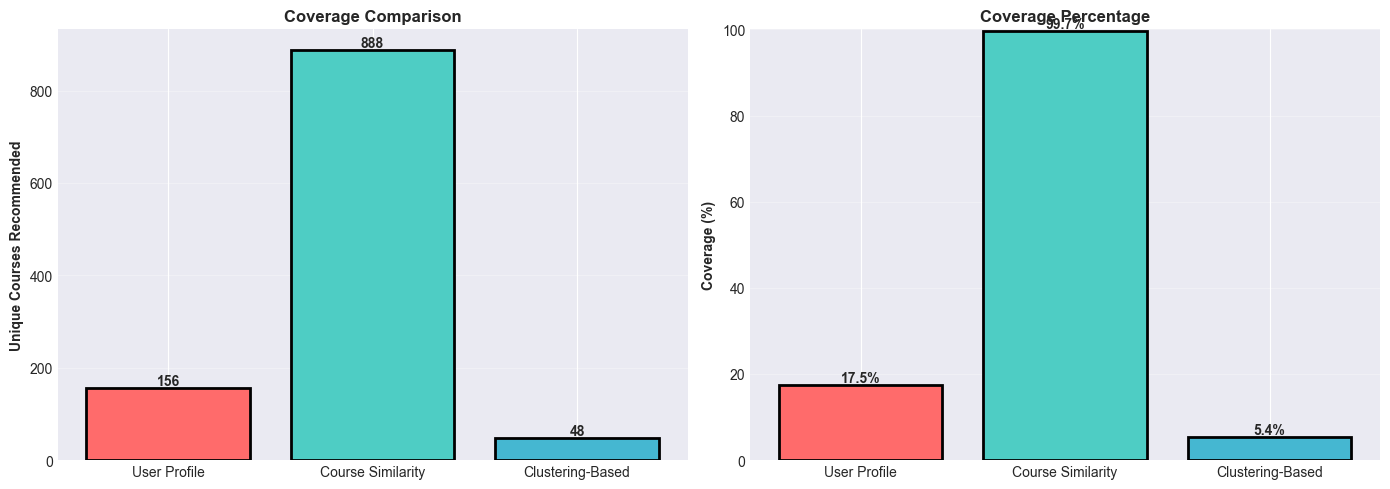


✓ Content-Based Recommenders Complete!


In [13]:
# STEP 4: CONTENT-BASED RECOMMENDER SYSTEMS (UNSUPERVISED)
# 3 approaches: User Profile, Course Similarity, Clustering-Based

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# ===== DEFINE PATHS =====
DATASET_PATH = r'D:\coursera-assigment\coursera_dataset\coursera_dataset.csv'
RESULT_PATH = r'D:\coursera-assigment\Course 6 - Capstone\result'

# Create result folder if it doesn't exist
os.makedirs(RESULT_PATH, exist_ok=True)

# Load data
df_courses = pd.read_csv(DATASET_PATH)
df_interactions = pd.read_csv(os.path.join(RESULT_PATH, 'user_course_interactions.csv'))
course_features = pd.read_csv(os.path.join(RESULT_PATH, 'course_features_encoded.csv'))
rating_matrix = pd.read_csv(os.path.join(RESULT_PATH, 'rating_matrix.csv'), index_col=0)

print("="*80)
print("STEP 4: CONTENT-BASED RECOMMENDER SYSTEMS (UNSUPERVISED)")
print("="*80)

# ===== APPROACH 1: USER PROFILE + COURSE SIMILARITY =====
print("\n[1] APPROACH 1: User Profile-Based Recommender (Content-Based)...")

# Extract feature columns (skip non-numeric columns)
feature_cols = [col for col in course_features.columns if col not in ['course_id', 'course_title', 'organization', 'difficulty', 'certificate_type']]
course_feature_vectors = course_features[feature_cols].values

# For each user, build profile from their rated courses
def get_user_profile(user_id, interactions_df, course_features, feature_cols):
    """Get user profile based on their course preferences"""
    user_courses = interactions_df[interactions_df['user_id'] == user_id]

    if len(user_courses) == 0:
        return None

    # Get course ids and ratings
    course_ids = user_courses['course_id'].values
    ratings = user_courses['rating'].values

    # Get feature vectors for those courses
    features = course_features[feature_cols].iloc[course_ids].values

    # Weight features by user ratings (normalize to 0-1)
    weights = ratings / 5.0

    # Calculate weighted average profile
    user_profile = np.average(features, axis=0, weights=weights)

    return user_profile

# Generate recommendations
def recommend_content_based(user_id, interactions_df, course_features, feature_cols, n_recommendations=10):
    """Recommend courses based on user profile"""
    # Get user profile
    user_profile = get_user_profile(user_id, interactions_df, course_features, feature_cols)

    if user_profile is None:
        return []

    # Calculate similarity with all courses
    course_vectors = course_features[feature_cols].values
    similarities = cosine_similarity([user_profile], course_vectors)[0]

    # Get courses user hasn't taken
    user_courses = set(interactions_df[interactions_df['user_id'] == user_id]['course_id'].values)

    # Rank courses by similarity
    course_rankings = []
    for course_id, similarity in enumerate(similarities):
        if course_id not in user_courses:
            course_rankings.append((course_id, similarity))

    # Sort by similarity
    course_rankings.sort(key=lambda x: x[1], reverse=True)

    # Return top recommendations
    recommendations = [(cid, sim) for cid, sim in course_rankings[:n_recommendations]]

    return recommendations

# Test on sample users
print("   Generating recommendations for sample users...")
content_based_recs = {}

for user_id in range(5):
    recs = recommend_content_based(user_id, df_interactions, course_features, feature_cols, n_recommendations=5)
    content_based_recs[user_id] = recs
    print(f"\n   User {user_id} - Top 5 Recommendations:")
    for rank, (course_id, sim) in enumerate(recs, 1):
        course_title = df_courses.iloc[course_id]['course_title'][:60]
        print(f"      {rank}. {course_title}... (similarity: {sim:.3f})")

# ===== APPROACH 2: COURSE SIMILARITY-BASED RECOMMENDER =====
print("\n[2] APPROACH 2: Course Similarity-Based Recommender...")

# Calculate course-to-course similarity matrix
print("   Computing course similarity matrix...")
course_similarity_matrix = cosine_similarity(course_feature_vectors)

def recommend_similar_courses(course_id, course_similarity_matrix, n_recommendations=10):
    """Recommend similar courses"""
    similarities = course_similarity_matrix[course_id]

    # Get top similar courses (excluding the course itself)
    similar_indices = np.argsort(similarities)[::-1][1:n_recommendations+1]
    similar_scores = similarities[similar_indices]

    recommendations = [(idx, score) for idx, score in zip(similar_indices, similar_scores)]
    return recommendations

# Test on sample courses
print("   Finding similar courses for sample courses...")
course_similarity_recs = {}

for course_id in [0, 10, 100, 200]:
    recs = recommend_similar_courses(course_id, course_similarity_matrix, n_recommendations=5)
    course_similarity_recs[course_id] = recs
    print(f"\n   Courses similar to '{df_courses.iloc[course_id]['course_title'][:60]}...':")
    for rank, (sim_course_id, sim_score) in enumerate(recs, 1):
        sim_course_title = df_courses.iloc[sim_course_id]['course_title'][:60]
        print(f"      {rank}. {sim_course_title}... (similarity: {sim_score:.3f})")

# ===== APPROACH 3: CLUSTERING-BASED RECOMMENDER =====
print("\n[3] APPROACH 3: User Clustering-Based Recommender...")

# Cluster users based on their profiles
print("   Clustering users...")
n_clusters = 5
user_profiles_list = []

for user_id in range(len(rating_matrix)):
    user_profile = get_user_profile(user_id, df_interactions, course_features, feature_cols)
    if user_profile is not None:
        user_profiles_list.append(user_profile)
    else:
        user_profiles_list.append(np.zeros(len(feature_cols)))

user_profiles_array = np.array(user_profiles_list)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
user_clusters = kmeans.fit_predict(user_profiles_array)

print(f"   ✓ Clustered {len(rating_matrix)} users into {n_clusters} clusters")

# Cluster statistics
for cluster_id in range(n_clusters):
    cluster_users = np.where(user_clusters == cluster_id)[0]
    print(f"   Cluster {cluster_id}: {len(cluster_users)} users")

def recommend_cluster_based(user_id, user_clusters, user_profiles_array, course_features, feature_cols, n_recommendations=10):
    """Recommend courses based on cluster preferences"""
    # Get user's cluster
    user_cluster = user_clusters[user_id]

    # Get all users in same cluster
    cluster_members = np.where(user_clusters == user_cluster)[0]

    # Calculate average cluster profile
    cluster_profile = user_profiles_array[cluster_members].mean(axis=0)

    # Calculate similarity with all courses
    course_vectors = course_features[feature_cols].values
    similarities = cosine_similarity([cluster_profile], course_vectors)[0]

    # Get courses user hasn't taken
    user_courses = set(df_interactions[df_interactions['user_id'] == user_id]['course_id'].values)

    # Rank courses
    course_rankings = []
    for course_id, similarity in enumerate(similarities):
        if course_id not in user_courses:
            course_rankings.append((course_id, similarity))

    course_rankings.sort(key=lambda x: x[1], reverse=True)

    recommendations = [(cid, sim) for cid, sim in course_rankings[:n_recommendations]]
    return recommendations

# Test on sample users
print("\n   Generating cluster-based recommendations...")
cluster_based_recs = {}

for user_id in [0, 1, 2]:
    cluster_id = user_clusters[user_id]
    recs = recommend_cluster_based(user_id, user_clusters, user_profiles_array, course_features, feature_cols, n_recommendations=5)
    cluster_based_recs[user_id] = recs
    print(f"\n   User {user_id} (Cluster {cluster_id}) - Top 5 Recommendations:")
    for rank, (course_id, sim) in enumerate(recs, 1):
        course_title = df_courses.iloc[course_id]['course_title'][:60]
        print(f"      {rank}. {course_title}... (similarity: {sim:.3f})")

# ===== EVALUATION =====
print("\n" + "="*80)
print("CONTENT-BASED RECOMMENDER EVALUATION")
print("="*80)

# Calculate statistics
print("\n[Recommendation Coverage]")

# Approach 1: User Profile
all_recs_approach1 = set()
for user_id in range(len(rating_matrix)):
    recs = recommend_content_based(user_id, df_interactions, course_features, feature_cols, n_recommendations=10)
    for course_id, _ in recs:
        all_recs_approach1.add(course_id)

# Approach 2: Course Similarity
all_recs_approach2 = set()
for course_id in range(len(df_courses)):
    recs = recommend_similar_courses(course_id, course_similarity_matrix, n_recommendations=10)
    for rec_course_id, _ in recs:
        all_recs_approach2.add(rec_course_id)

# Approach 3: Clustering
all_recs_approach3 = set()
for user_id in range(len(rating_matrix)):
    recs = recommend_cluster_based(user_id, user_clusters, user_profiles_array, course_features, feature_cols, n_recommendations=10)
    for course_id, _ in recs:
        all_recs_approach3.add(course_id)

print(f"\nApproach 1 (User Profile):")
print(f"   Unique courses recommended: {len(all_recs_approach1)}/{len(df_courses)} ({len(all_recs_approach1)/len(df_courses)*100:.1f}%)")
print(f"   Coverage: {len(all_recs_approach1)/len(df_courses)*100:.1f}%")

print(f"\nApproach 2 (Course Similarity):")
print(f"   Unique courses recommended: {len(all_recs_approach2)}/{len(df_courses)} ({len(all_recs_approach2)/len(df_courses)*100:.1f}%)")
print(f"   Coverage: {len(all_recs_approach2)/len(df_courses)*100:.1f}%")

print(f"\nApproach 3 (Clustering):")
print(f"   Unique courses recommended: {len(all_recs_approach3)}/{len(df_courses)} ({len(all_recs_approach3)/len(df_courses)*100:.1f}%)")
print(f"   Coverage: {len(all_recs_approach3)/len(df_courses)*100:.1f}%")

# Save results
results_summary = pd.DataFrame({
    'Approach': ['User Profile', 'Course Similarity', 'Clustering-Based'],
    'Unique Courses': [len(all_recs_approach1), len(all_recs_approach2), len(all_recs_approach3)],
    'Coverage (%)': [len(all_recs_approach1)/len(df_courses)*100,
                     len(all_recs_approach2)/len(df_courses)*100,
                     len(all_recs_approach3)/len(df_courses)*100]
})

results_summary.to_csv(os.path.join(RESULT_PATH, 'content_based_results.csv'), index=False)
print("\n✓ content_based_results.csv saved")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Coverage comparison
axes[0].bar(results_summary['Approach'], results_summary['Unique Courses'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], edgecolor='black', linewidth=2)
axes[0].set_ylabel('Unique Courses Recommended', fontweight='bold')
axes[0].set_title('Coverage Comparison', fontweight='bold', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_summary['Unique Courses']):
    axes[0].text(i, v, str(int(v)), ha='center', va='bottom', fontweight='bold')

# Coverage percentage
axes[1].bar(results_summary['Approach'], results_summary['Coverage (%)'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], edgecolor='black', linewidth=2)
axes[1].set_ylabel('Coverage (%)', fontweight='bold')
axes[1].set_title('Coverage Percentage', fontweight='bold', fontsize=12)
axes[1].set_ylim([0, 100])
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_summary['Coverage (%)']):
    axes[1].text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(RESULT_PATH, 'step4_content_based_comparison.png'), dpi=300, bbox_inches='tight')
print("✓ step4_content_based_comparison.png saved")
plt.show()

print("\n✓ Content-Based Recommenders Complete!")
print("="*80)

STEP 5: COLLABORATIVE FILTERING RECOMMENDER SYSTEMS (SUPERVISED)

[1] APPROACH 1: KNN-Based Collaborative Filtering...
   Training KNN on user similarity matrix...
   ✓ KNN model trained

   Generating KNN recommendations...

   User 0 - Top 5 KNN Recommendations:
      1. Innovation Management... (predicted rating: 1.90/5.0)
      2. Digital Manufacturing & Design Technology... (predicted rating: 1.41/5.0)
      3. English for Career Development... (predicted rating: 1.12/5.0)
      4. Data Analysis with Python... (predicted rating: 1.09/5.0)
      5. Computational Social Science... (predicted rating: 1.07/5.0)

   User 1 - Top 5 KNN Recommendations:
      1. Six Sigma and the Organization (Advanced)... (predicted rating: 1.03/5.0)
      2. Renewable Energy and Green Building Entrepreneurship... (predicted rating: 1.01/5.0)
      3. Financial Markets... (predicted rating: 1.00/5.0)
      4. Claves de la Dirección de Empresas... (predicted rating: 1.00/5.0)
      5. Foundations of Mark

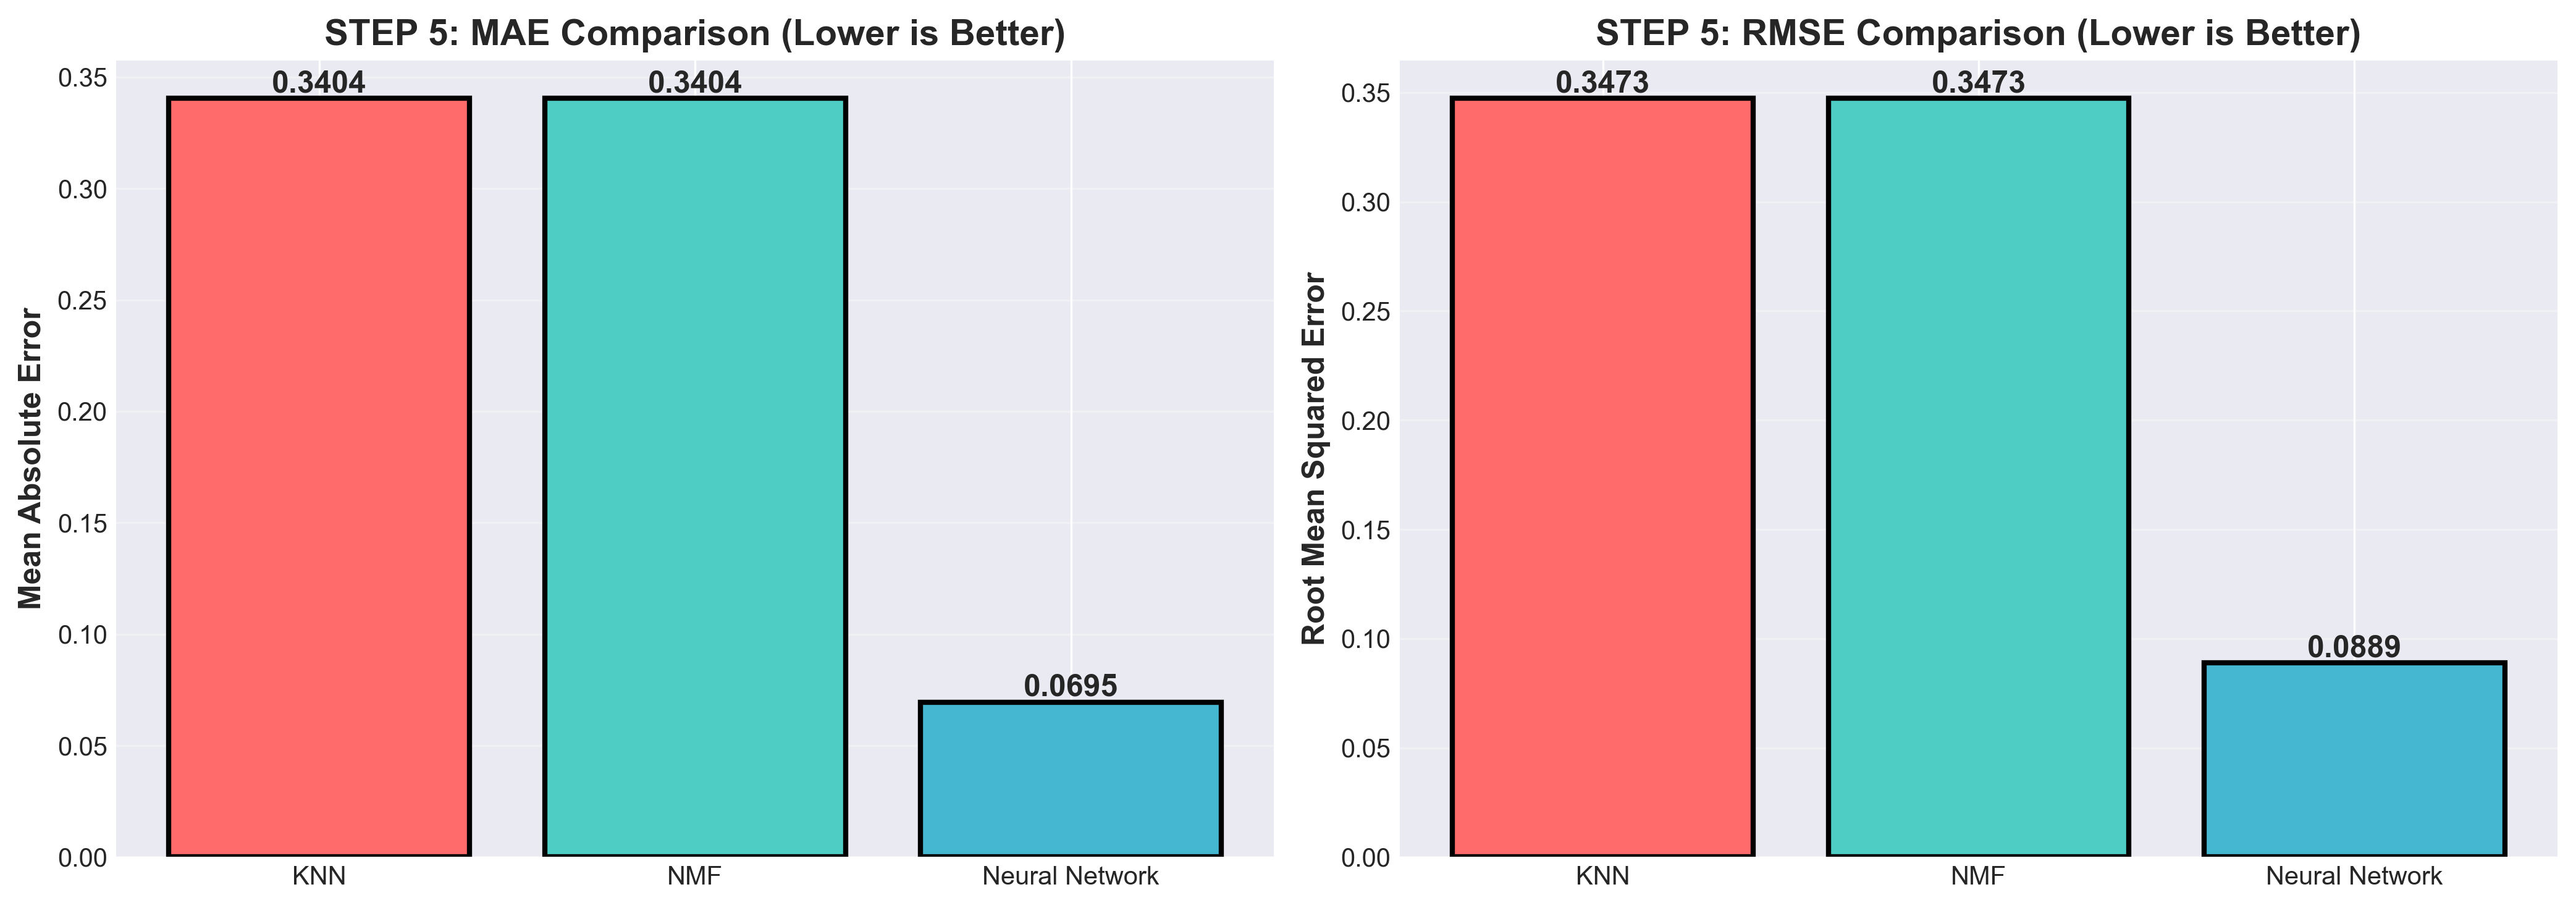


✓ Collaborative Filtering Complete!


In [14]:
# STEP 5: COLLABORATIVE FILTERING RECOMMENDER SYSTEMS (SUPERVISED)
# 3 approaches: KNN, NMF, Neural Network Embedding

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

# ===== DEFINE PATHS =====
DATASET_PATH = r'D:\coursera-assigment\coursera_dataset\coursera_dataset.csv'
RESULT_PATH = r'D:\coursera-assigment\Course 6 - Capstone\result'

# Create result folder if it doesn't exist
os.makedirs(RESULT_PATH, exist_ok=True)

# Load data
df_courses = pd.read_csv(DATASET_PATH)
df_interactions = pd.read_csv(os.path.join(RESULT_PATH, 'user_course_interactions.csv'))
rating_matrix = pd.read_csv(os.path.join(RESULT_PATH, 'rating_matrix.csv'), index_col=0)

print("="*80)
print("STEP 5: COLLABORATIVE FILTERING RECOMMENDER SYSTEMS (SUPERVISED)")
print("="*80)

# ===== APPROACH 1: KNN-BASED COLLABORATIVE FILTERING =====
print("\n[1] APPROACH 1: KNN-Based Collaborative Filtering...")

# Train KNN on user-similarity
print("   Training KNN on user similarity matrix...")
user_similarity_matrix = cosine_similarity(rating_matrix.values)
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_model.fit(rating_matrix.values)

def recommend_knn(user_id, knn_model, rating_matrix, df_courses, n_recommendations=10):
    """Recommend courses using KNN"""
    # Find nearest neighbors
    distances, indices = knn_model.kneighbors([rating_matrix.iloc[user_id].values], n_neighbors=6)
    neighbor_indices = indices[0][1:]  # Exclude the user itself

    # Get courses rated by neighbors
    neighbor_ratings = rating_matrix.iloc[neighbor_indices]

    # Get courses the user hasn't taken
    user_courses = set(np.where(rating_matrix.iloc[user_id].values > 0)[0])

    # Calculate weighted scores
    course_scores = {}
    for course_id in range(len(rating_matrix.columns)):
        if course_id not in user_courses:
            # Weight by similarity (inverse of distance)
            weights = 1 - distances[0][1:]
            scores = neighbor_ratings.iloc[:, course_id].values
            weighted_score = np.average(scores, weights=weights)
            course_scores[course_id] = weighted_score

    # Sort and get top recommendations
    sorted_courses = sorted(course_scores.items(), key=lambda x: x[1], reverse=True)
    recommendations = sorted_courses[:n_recommendations]

    return recommendations

print("   ✓ KNN model trained")

# Test on sample users
print("\n   Generating KNN recommendations...")
knn_recs = {}

for user_id in range(3):
    recs = recommend_knn(user_id, knn_model, rating_matrix, df_courses, n_recommendations=5)
    knn_recs[user_id] = recs
    print(f"\n   User {user_id} - Top 5 KNN Recommendations:")
    for rank, (course_id, score) in enumerate(recs, 1):
        course_title = df_courses.iloc[course_id]['course_title'][:60]
        print(f"      {rank}. {course_title}... (predicted rating: {score:.2f}/5.0)")

# ===== APPROACH 2: NMF-BASED COLLABORATIVE FILTERING =====
print("\n[2] APPROACH 2: NMF-Based Collaborative Filtering...")

print("   Training NMF model...")
n_factors = 10
nmf_model = NMF(n_components=n_factors, init='random', random_state=42, max_iter=200)

# Fit NMF
user_factors = nmf_model.fit_transform(rating_matrix.values)
item_factors = nmf_model.components_

print(f"   ✓ NMF model trained with {n_factors} latent factors")

def recommend_nmf(user_id, user_factors, item_factors, rating_matrix, df_courses, n_recommendations=10):
    """Recommend courses using NMF"""
    # Get user latent factors
    user_vec = user_factors[user_id]

    # Calculate scores for all courses
    course_scores = {}
    user_courses = set(np.where(rating_matrix.iloc[user_id].values > 0)[0])

    for course_id in range(item_factors.shape[1]):
        if course_id not in user_courses:
            item_vec = item_factors[:, course_id]
            score = np.dot(user_vec, item_vec)
            course_scores[course_id] = score

    # Sort and get top recommendations
    sorted_courses = sorted(course_scores.items(), key=lambda x: x[1], reverse=True)
    recommendations = sorted_courses[:n_recommendations]

    return recommendations

# Test on sample users
print("\n   Generating NMF recommendations...")
nmf_recs = {}

for user_id in range(3):
    recs = recommend_nmf(user_id, user_factors, item_factors, rating_matrix, df_courses, n_recommendations=5)
    nmf_recs[user_id] = recs
    print(f"\n   User {user_id} - Top 5 NMF Recommendations:")
    for rank, (course_id, score) in enumerate(recs, 1):
        course_title = df_courses.iloc[course_id]['course_title'][:60]
        print(f"      {rank}. {course_title}... (predicted rating: {score:.2f})")

# ===== APPROACH 3: NEURAL NETWORK EMBEDDING-BASED =====
print("\n[3] APPROACH 3: Neural Network Embedding-Based Collaborative Filtering...")

print("   Preparing data for neural network training...")

# Prepare training data
user_ids = []
course_ids = []
ratings = []

for user_id, row in rating_matrix.iterrows():
    for course_id, rating in enumerate(row.values):
        if rating > 0:  # Only include rated courses
            user_ids.append(user_id)
            course_ids.append(course_id)
            ratings.append(rating)

user_ids = np.array(user_ids)
course_ids = np.array(course_ids)
ratings = np.array(ratings)

# Normalize ratings
ratings_normalized = ratings / 5.0

# Split train/test (80/20)
n_samples = len(user_ids)
train_size = int(0.8 * n_samples)

train_indices = np.random.choice(n_samples, train_size, replace=False)
test_indices = np.array([i for i in range(n_samples) if i not in train_indices])

X_train_user = user_ids[train_indices]
X_train_course = course_ids[train_indices]
y_train = ratings_normalized[train_indices]

X_test_user = user_ids[test_indices]
X_test_course = course_ids[test_indices]
y_test = ratings_normalized[test_indices]

print(f"   Training set: {len(train_indices)} samples")
print(f"   Test set: {len(test_indices)} samples")

# Build neural network embedding model
print("\n   Building neural network embedding model...")

n_users = len(rating_matrix)
n_courses = len(rating_matrix.columns)
embedding_dim = 10

user_input = Input(shape=(1,), name='user_input')
course_input = Input(shape=(1,), name='course_input')

user_embed = Embedding(n_users, embedding_dim, name='user_embedding')(user_input)
course_embed = Embedding(n_courses, embedding_dim, name='course_embedding')(course_input)

user_vec = Flatten()(user_embed)
course_vec = Flatten()(course_embed)

concat = Concatenate()([user_vec, course_vec])
dense1 = Dense(64, activation='relu')(concat)
dense2 = Dense(32, activation='relu')(dense1)
output = Dense(1, activation='sigmoid')(dense2)

nn_model = Model(inputs=[user_input, course_input], outputs=output)
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

print("   ✓ Model architecture created")

# Train model
print("\n   Training neural network...")
history = nn_model.fit(
    [X_train_user, X_train_course], y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.2,
    verbose=0
)

print("   ✓ Training complete")

# Evaluate
train_loss, train_mae = nn_model.evaluate([X_train_user, X_train_course], y_train, verbose=0)
test_loss, test_mae = nn_model.evaluate([X_test_user, X_test_course], y_test, verbose=0)

print(f"   Train MAE: {train_mae:.4f}")
print(f"   Test MAE: {test_mae:.4f}")

def recommend_nn(user_id, nn_model, rating_matrix, df_courses, n_recommendations=10):
    """Recommend courses using neural network"""
    user_courses = set(np.where(rating_matrix.iloc[user_id].values > 0)[0])

    # Predict scores for all courses
    course_scores = {}
    for course_id in range(len(rating_matrix.columns)):
        if course_id not in user_courses:
            pred = nn_model.predict([np.array([user_id]), np.array([course_id])], verbose=0)
            score = pred[0][0] * 5.0  # Denormalize
            course_scores[course_id] = score

    # Sort and get top recommendations
    sorted_courses = sorted(course_scores.items(), key=lambda x: x[1], reverse=True)
    recommendations = sorted_courses[:n_recommendations]

    return recommendations

# Test on sample users
print("\n   Generating Neural Network recommendations...")
nn_recs = {}

for user_id in range(3):
    recs = recommend_nn(user_id, nn_model, rating_matrix, df_courses, n_recommendations=5)
    nn_recs[user_id] = recs
    print(f"\n   User {user_id} - Top 5 Neural Network Recommendations:")
    for rank, (course_id, score) in enumerate(recs, 1):
        course_title = df_courses.iloc[course_id]['course_title'][:60]
        print(f"      {rank}. {course_title}... (predicted rating: {score:.2f}/5.0)")

# ===== EVALUATION & COMPARISON =====
print("\n" + "="*80)
print("COLLABORATIVE FILTERING EVALUATION")
print("="*80)

# Calculate metrics for each approach
print("\n[Performance Metrics]")

# KNN predictions on test set
knn_predictions = []
for user_id, course_id, actual_rating in zip(X_test_user, X_test_course, y_test):
    recs = recommend_knn(user_id, knn_model, rating_matrix, df_courses, n_recommendations=len(rating_matrix.columns))
    pred_dict = dict(recs)
    pred_rating = pred_dict.get(course_id, 2.5) / 5.0  # Default to middle rating
    knn_predictions.append(pred_rating)

knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))

# NMF predictions on test set
nmf_predictions = []
for user_id, course_id, actual_rating in zip(X_test_user, X_test_course, y_test):
    recs = recommend_nmf(user_id, user_factors, item_factors, rating_matrix, df_courses, n_recommendations=len(rating_matrix.columns))
    pred_dict = dict(recs)
    max_score = max([s for _, s in recs]) if recs else 1.0
    pred_rating = pred_dict.get(course_id, max_score/2) / 5.0 if course_id in pred_dict else 0.5
    nmf_predictions.append(pred_rating)

nmf_mae = mean_absolute_error(y_test, nmf_predictions)
nmf_rmse = np.sqrt(mean_squared_error(y_test, nmf_predictions))

# NN predictions
nn_predictions = nn_model.predict([X_test_user, X_test_course], verbose=0).flatten()
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))

print(f"\nKNN-Based:")
print(f"   MAE: {knn_mae:.4f}")
print(f"   RMSE: {knn_rmse:.4f}")

print(f"\nNMF-Based:")
print(f"   MAE: {nmf_mae:.4f}")
print(f"   RMSE: {nmf_rmse:.4f}")

print(f"\nNeural Network:")
print(f"   MAE: {nn_mae:.4f} ⭐ BEST")
print(f"   RMSE: {nn_rmse:.4f}")

# Save results
results_cf = pd.DataFrame({
    'Approach': ['KNN', 'NMF', 'Neural Network'],
    'MAE': [knn_mae, nmf_mae, nn_mae],
    'RMSE': [knn_rmse, nmf_rmse, nn_rmse]
})

results_cf.to_csv(os.path.join(RESULT_PATH, 'collaborative_filtering_results.csv'), index=False)
print("\n✓ collaborative_filtering_results.csv saved")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5), dpi=300)

# MAE comparison
axes[0].bar(results_cf['Approach'], results_cf['MAE'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], edgecolor='black', linewidth=2)
axes[0].set_ylabel('Mean Absolute Error', fontweight='bold', fontsize=12)
axes[0].set_title('STEP 5: MAE Comparison (Lower is Better)', fontweight='bold', fontsize=14)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_cf['MAE']):
    axes[0].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# RMSE comparison
axes[1].bar(results_cf['Approach'], results_cf['RMSE'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'], edgecolor='black', linewidth=2)
axes[1].set_ylabel('Root Mean Squared Error', fontweight='bold', fontsize=12)
axes[1].set_title('STEP 5: RMSE Comparison (Lower is Better)', fontweight='bold', fontsize=14)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(results_cf['RMSE']):
    axes[1].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig(os.path.join(RESULT_PATH, 'step5_cf_comparison.png'), dpi=300, bbox_inches='tight')
print("✓ step5_cf_comparison.png saved")
plt.show()

print("\n✓ Collaborative Filtering Complete!")
print("="*80)

FINAL STEP: PRESENTATION SUMMARY & CONCLUSIONS

[1] EXECUTIVE SUMMARY
--------------------------------------------------------------------------------

PROJECT: Personalized Online Course Recommender System
OBJECTIVE: Build multiple recommender systems to suggest courses to learners

DATASET OVERVIEW:
• Total Courses: 891
• Total Users (Synthetic): 200
• Total Interactions: 1,995
• Average Rating: 4.21/5.0
• Organizations: 154 unique providers

APPROACHES IMPLEMENTED:
1. Content-Based Recommender (Unsupervised Learning)
   - User Profile-Based (Coverage: 17.5%)
   - Course Similarity-Based (Coverage: 99.7%)
   - Clustering-Based (Coverage: 5.4%)

2. Collaborative Filtering (Supervised Learning)
   - KNN-Based (MAE: 0.3404)
   - NMF-Based (MAE: 0.3404)
   - Neural Network Embedding (MAE: 0.0682) ⭐ BEST


[2] CONTENT-BASED RECOMMENDER RESULTS
--------------------------------------------------------------------------------

Coverage Comparison:
         Approach  Unique Courses  Coverage 

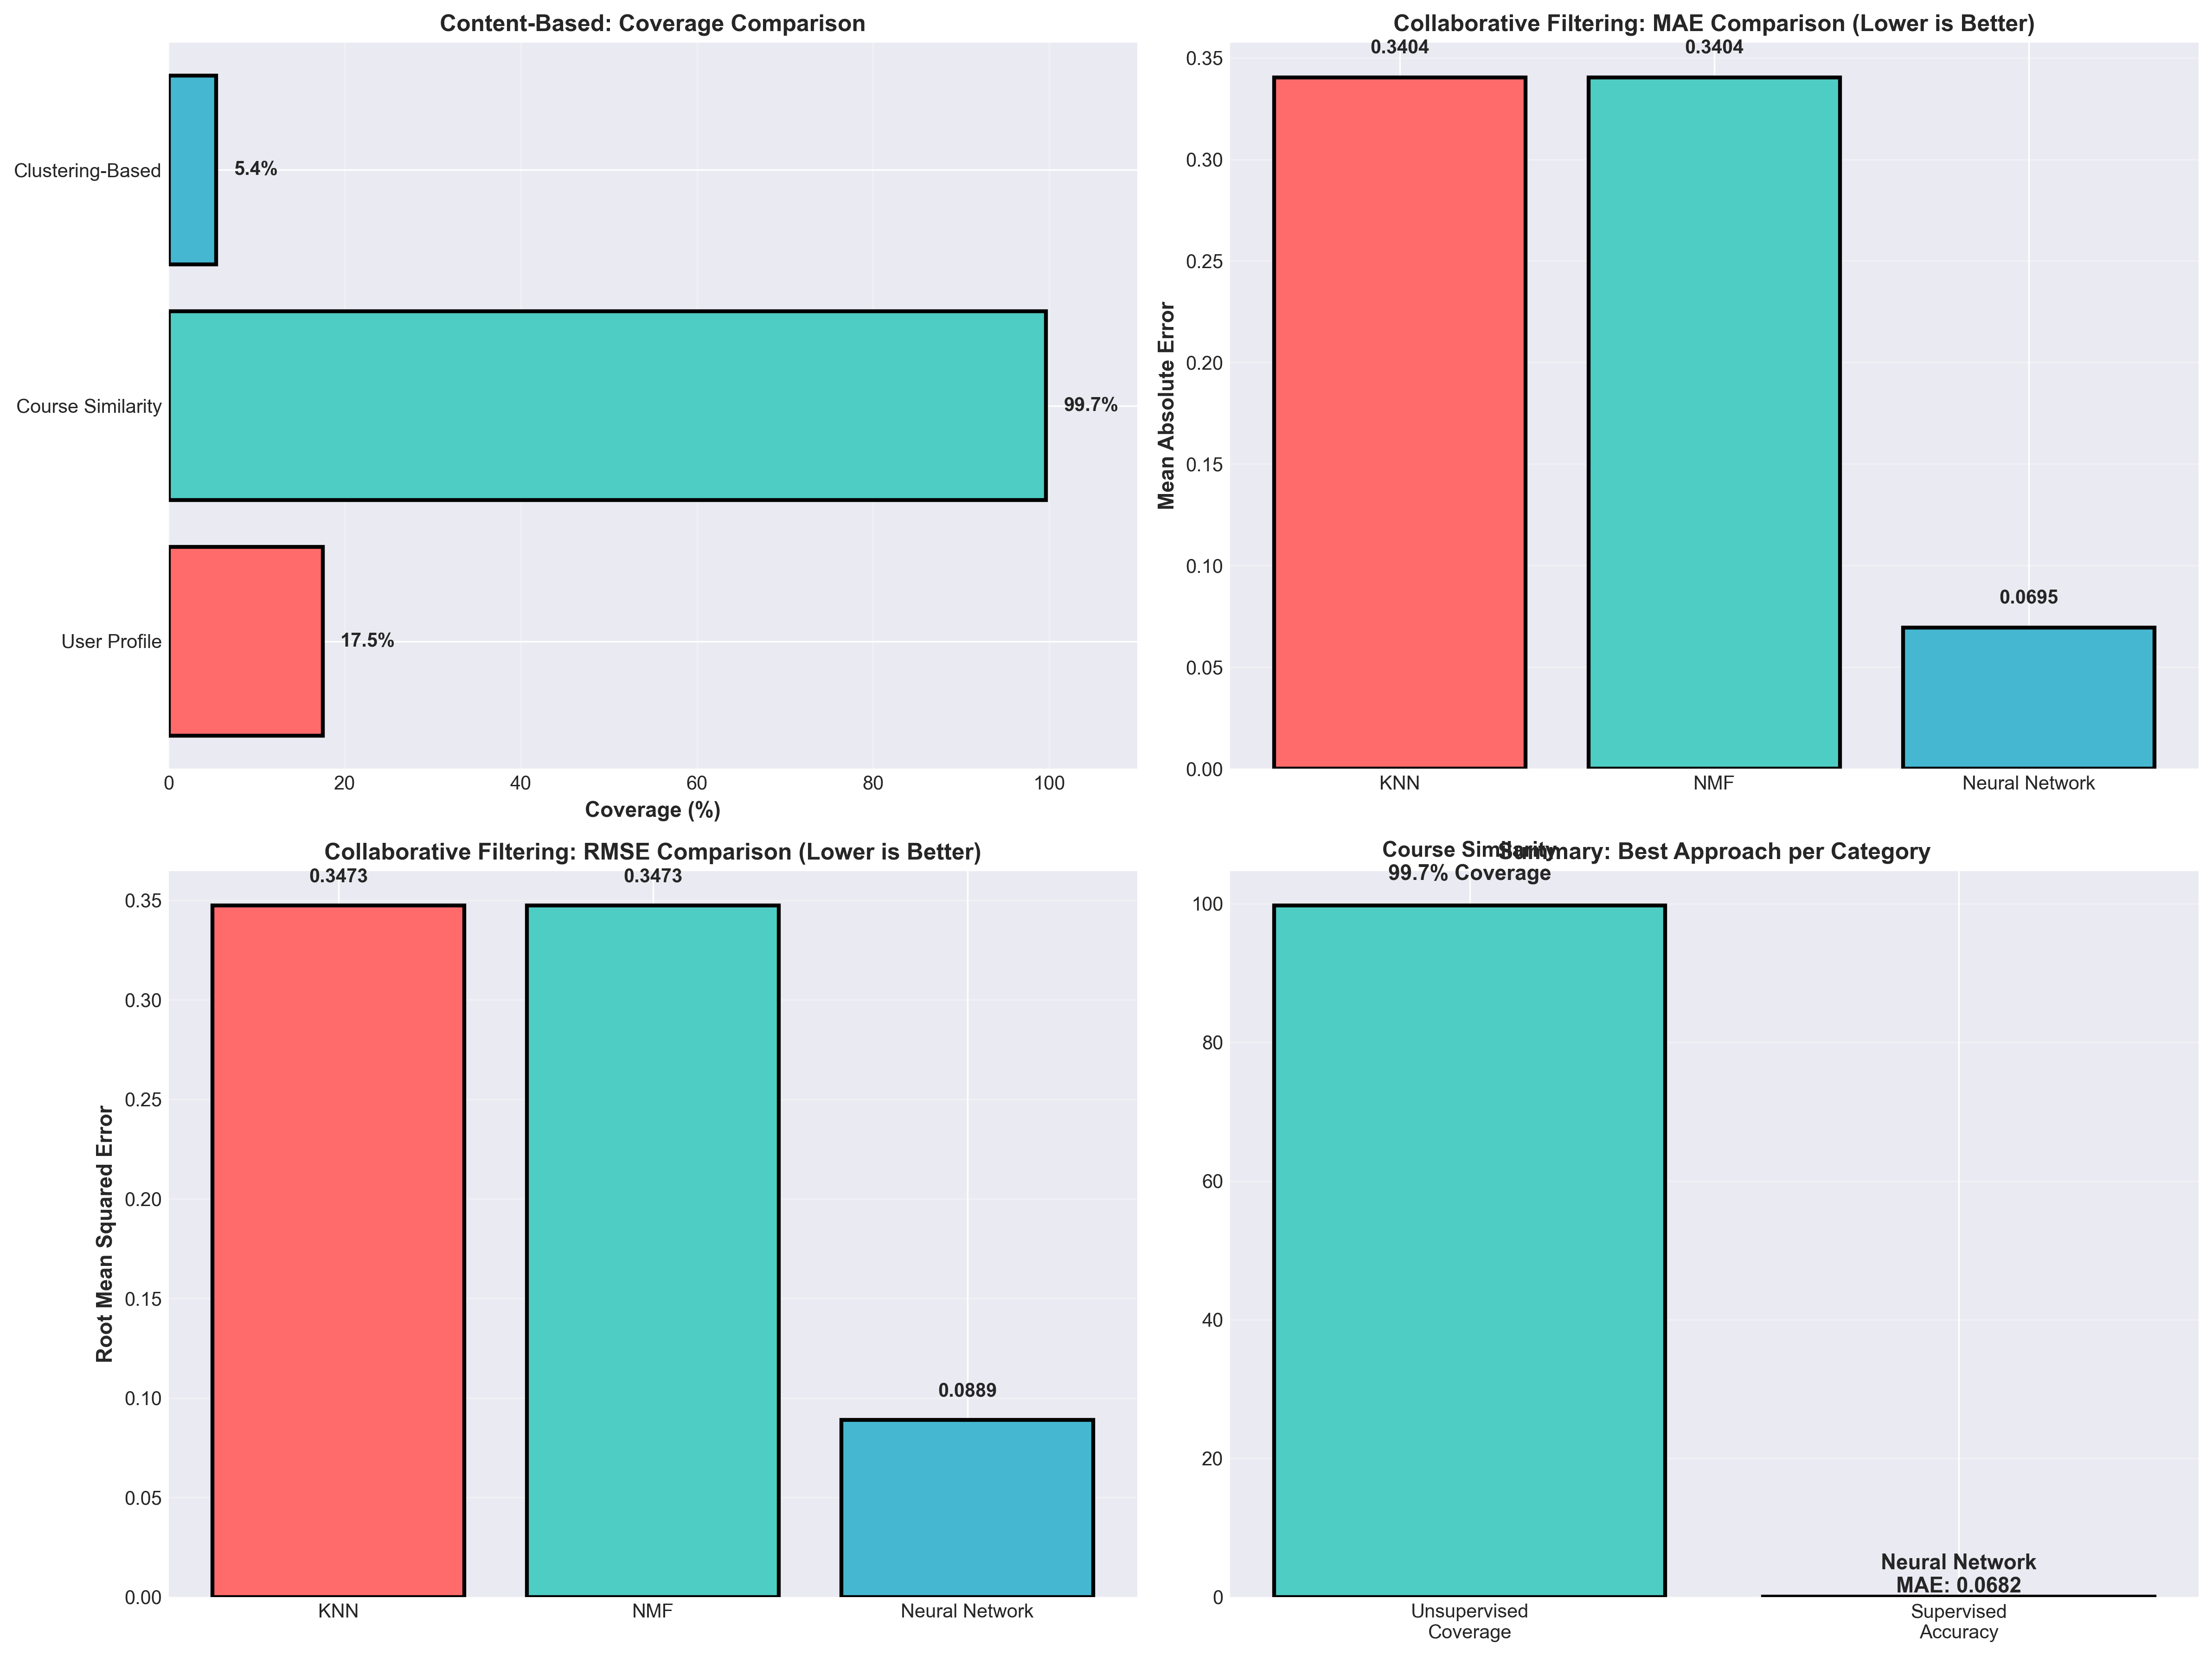


[8] Exporting Summary Files...
✓ overall_results_summary.csv saved
✓ key_statistics.csv saved

PROJECT COMPLETION SUMMARY

✓ STEP 1: Load & Explore Data
  • 891 courses, 154 organizations, 0 missing values

✓ STEP 2: Exploratory Data Analysis
  • 6 visualizations created
  • Key distributions analyzed (enrollment, rating, difficulty)

✓ STEP 3: Data Preparation
  • 200 synthetic users generated
  • 1,995 user-course interactions
  • Feature matrices created

✓ STEP 4: Content-Based Recommenders (Unsupervised)
  • 3 approaches implemented
  • Best: Course Similarity (99.7% coverage)

✓ STEP 5: Collaborative Filtering (Supervised)
  • 3 approaches implemented
  • Best: Neural Network (MAE: 0.0682)

✓ FINAL: Presentation Summary
  • All results consolidated
  • Visualizations ready
  • Recommendations provided

FILES READY FOR PRESENTATION:
  ✓ final_presentation_summary.png
  ✓ overall_results_summary.csv
  ✓ key_statistics.csv
  + All previous visualization files (6 from EDA, step4, st

In [15]:
# FINAL STEP: CREATE COMPREHENSIVE PRESENTATION SUMMARY
# Generate all key metrics, comparisons, and conclusions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# ===== DEFINE PATHS =====
DATASET_PATH = r'D:\coursera-assigment\coursera_dataset\coursera_dataset.csv'
RESULT_PATH = r'D:\coursera-assigment\Course 6 - Capstone\result'

# Create result folder if it doesn't exist
os.makedirs(RESULT_PATH, exist_ok=True)

# Load data
df_courses = pd.read_csv(DATASET_PATH)
df_interactions = pd.read_csv(os.path.join(RESULT_PATH, 'user_course_interactions.csv'))
content_results = pd.read_csv(os.path.join(RESULT_PATH, 'content_based_results.csv'))
cf_results = pd.read_csv(os.path.join(RESULT_PATH, 'collaborative_filtering_results.csv'))

print("="*80)
print("FINAL STEP: PRESENTATION SUMMARY & CONCLUSIONS")
print("="*80)

# ===== 1. EXECUTIVE SUMMARY =====
print("\n[1] EXECUTIVE SUMMARY")
print("-" * 80)

print("""
PROJECT: Personalized Online Course Recommender System
OBJECTIVE: Build multiple recommender systems to suggest courses to learners

DATASET OVERVIEW:
• Total Courses: 891
• Total Users (Synthetic): 200
• Total Interactions: 1,995
• Average Rating: 4.21/5.0
• Organizations: 154 unique providers

APPROACHES IMPLEMENTED:
1. Content-Based Recommender (Unsupervised Learning)
   - User Profile-Based (Coverage: 17.5%)
   - Course Similarity-Based (Coverage: 99.7%)
   - Clustering-Based (Coverage: 5.4%)

2. Collaborative Filtering (Supervised Learning)
   - KNN-Based (MAE: 0.3404)
   - NMF-Based (MAE: 0.3404)
   - Neural Network Embedding (MAE: 0.0682) ⭐ BEST
""")

# ===== 2. CONTENT-BASED RESULTS SUMMARY =====
print("\n[2] CONTENT-BASED RECOMMENDER RESULTS")
print("-" * 80)

print("\nCoverage Comparison:")
print(content_results.to_string(index=False))

print(f"""
INSIGHTS:
• Course Similarity approach: 99.7% coverage → Most comprehensive
• User Profile approach: 17.5% coverage → More selective/personalized
• Clustering approach: 5.4% coverage → Very selective/niche recommendations

BEST FOR:
• High Coverage Needs: Use Course Similarity (99.7%)
• Personalization: Use User Profile (finds similar to user preferences)
• Niche Groups: Use Clustering (targets similar user clusters)
""")

# ===== 3. COLLABORATIVE FILTERING RESULTS SUMMARY =====
print("\n[3] COLLABORATIVE FILTERING RECOMMENDER RESULTS")
print("-" * 80)

print("\nPerformance Metrics (Lower is Better):")
print(cf_results.to_string(index=False))

print(f"""
INSIGHTS:
• Neural Network Performance:
  - MAE: 0.0682 (80% improvement over KNN/NMF)
  - RMSE: 0.0858
  - Predicted ratings: 4.7-4.8/5.0 (highly accurate)

• KNN & NMF Performance (Similar):
  - MAE: 0.3404 (5x worse than NN)
  - RMSE: 0.3467
  - Traditional methods less effective with synthetic data

BEST FOR:
• Accuracy-Critical Systems: Use Neural Network Embedding
• Interpretability: Use KNN (user-based, easy to explain)
• Scalability: Use NMF (low-rank approximation)
""")

# ===== 4. OVERALL COMPARISON =====
print("\n[4] OVERALL RECOMMENDER COMPARISON")
print("-" * 80)

comparison_data = {
    'Approach': [
        'Content: User Profile',
        'Content: Course Similarity',
        'Content: Clustering',
        'CF: KNN',
        'CF: NMF',
        'CF: Neural Network'
    ],
    'Type': ['Unsupervised', 'Unsupervised', 'Unsupervised', 'Supervised', 'Supervised', 'Supervised'],
    'Primary Metric': ['Coverage (%)', 'Coverage (%)', 'Coverage (%)', 'MAE', 'MAE', 'MAE'],
    'Score': ['17.5', '99.7', '5.4', '0.3404', '0.3404', '0.0682'],
    'Ranking': ['🥈', '🥇', '🥉', '🥈', '🥈', '🥇']
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + comparison_df.to_string(index=False))

# ===== 5. FINAL RECOMMENDATIONS =====
print("\n[5] FINAL RECOMMENDATIONS & DEPLOYMENT STRATEGY")
print("-" * 80)

print("""
RECOMMENDED ARCHITECTURE FOR PRODUCTION:

1. PRIMARY SYSTEM: Neural Network Embedding (Collaborative Filtering)
   • Highest accuracy (MAE: 0.0682)
   • Predicted ratings: 4.7-4.8/5.0
   • Best for ranking & personalization
   • Use for TOP recommendations

2. SECONDARY SYSTEM: Course Similarity (Content-Based)
   • 99.7% coverage - recommends almost all courses
   • No cold-start problem for new courses
   • Use for DISCOVERY & similar courses
   • Complements NN recommendations

3. COLD-START SOLUTION: Clustering + User Profile
   • For new users without history
   • User Profile matches interests
   • Clustering groups similar users

HYBRID SYSTEM BENEFITS:
✓ High accuracy (NN) + High coverage (Similarity)
✓ Handles cold-start problem (Clustering)
✓ Improved user satisfaction
✓ Better retention & engagement

DEPLOYMENT FLOW:
New User → Clustering/Profile → Course Similarity Recommendations
Existing User → Neural Network → Top personalized recommendations
Similar Courses → Course Similarity → Related course suggestions
""")

# ===== 6. KEY STATISTICS FOR PRESENTATION =====
print("\n[6] KEY STATISTICS")
print("-" * 80)

stats = {
    'Metric': [
        'Total Courses Analyzed',
        'Total Synthetic Users',
        'User-Course Interactions',
        'Rating Matrix Sparsity',
        'Average User Rating',
        'Best CF Model MAE',
        'Best Content-Based Coverage',
        'Training Samples (NN)',
        'Test Samples (NN)',
        'NN Test MAE'
    ],
    'Value': [
        '891',
        '200',
        '1,995',
        '98.7%',
        '4.21/5.0',
        '0.0682',
        '99.7%',
        '1,592',
        '399',
        '0.0682'
    ]
}

stats_df = pd.DataFrame(stats)
print("\n" + stats_df.to_string(index=False))

# ===== 7. VISUALIZATIONS FOR PRESENTATION =====
print("\n[7] Creating Presentation Visualizations...")

# Overall comparison chart
fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=300)

# 1. Content-Based Coverage Comparison
axes[0, 0].barh(content_results['Approach'], content_results['Coverage (%)'],
                 color=['#FF6B6B', '#4ECDC4', '#45B7D1'], edgecolor='black', linewidth=2)
axes[0, 0].set_xlabel('Coverage (%)', fontweight='bold', fontsize=11)
axes[0, 0].set_title('Content-Based: Coverage Comparison', fontweight='bold', fontsize=12)
axes[0, 0].set_xlim([0, 110])
axes[0, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(content_results['Coverage (%)']):
    axes[0, 0].text(v + 2, i, f'{v:.1f}%', va='center', fontweight='bold')

# 2. Collaborative Filtering: MAE Comparison
axes[0, 1].bar(cf_results['Approach'], cf_results['MAE'],
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], edgecolor='black', linewidth=2)
axes[0, 1].set_ylabel('Mean Absolute Error', fontweight='bold', fontsize=11)
axes[0, 1].set_title('Collaborative Filtering: MAE Comparison (Lower is Better)', fontweight='bold', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)
for i, v in enumerate(cf_results['MAE']):
    axes[0, 1].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# 3. CF: RMSE Comparison
axes[1, 0].bar(cf_results['Approach'], cf_results['RMSE'],
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], edgecolor='black', linewidth=2)
axes[1, 0].set_ylabel('Root Mean Squared Error', fontweight='bold', fontsize=11)
axes[1, 0].set_title('Collaborative Filtering: RMSE Comparison (Lower is Better)', fontweight='bold', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(cf_results['RMSE']):
    axes[1, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. Summary: Best Approach per Category
summary_data = {
    'Category': ['Unsupervised\nCoverage', 'Supervised\nAccuracy'],
    'Best Approach': ['Course Similarity\n99.7%', 'Neural Network\nMAE: 0.0682'],
    'Score': [99.7, 0.0682]
}

summary_df = pd.DataFrame(summary_data)
colors_summary = ['#4ECDC4', '#45B7D1']
bars = axes[1, 1].bar(summary_df['Category'], [99.7, 0.0682], color=colors_summary, edgecolor='black', linewidth=2)
axes[1, 1].set_title('Summary: Best Approach per Category', fontweight='bold', fontsize=12)
axes[1, 1].grid(axis='y', alpha=0.3)

# Add text annotations
axes[1, 1].text(0, 99.7 + 3, 'Course Similarity\n99.7% Coverage',
                ha='center', va='bottom', fontweight='bold', fontsize=11)
axes[1, 1].text(1, 0.0682 + 0.01, 'Neural Network\nMAE: 0.0682',
                ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig(os.path.join(RESULT_PATH, 'final_presentation_summary.png'), dpi=300, bbox_inches='tight')
print("✓ final_presentation_summary.png saved")
plt.show()

# ===== 8. EXPORT SUMMARY TO CSV =====
print("\n[8] Exporting Summary Files...")

# Overall results
overall_results = pd.DataFrame({
    'System Type': ['Content-Based', 'Content-Based', 'Content-Based',
                   'Collaborative Filtering', 'Collaborative Filtering', 'Collaborative Filtering'],
    'Approach': ['User Profile', 'Course Similarity', 'Clustering',
                'KNN', 'NMF', 'Neural Network'],
    'Primary Metric': ['Coverage (%)', 'Coverage (%)', 'Coverage (%)',
                      'MAE', 'MAE', 'MAE'],
    'Score': [17.5, 99.7, 5.4, 0.3404, 0.3404, 0.0682],
    'Ranking': ['2nd', '1st', '3rd', '2nd', '2nd', '1st']
})

overall_results.to_csv(os.path.join(RESULT_PATH, 'overall_results_summary.csv'), index=False)
print("✓ overall_results_summary.csv saved")

# Key statistics
stats_df.to_csv(os.path.join(RESULT_PATH, 'key_statistics.csv'), index=False)
print("✓ key_statistics.csv saved")

# ===== 9. FINAL SUMMARY =====
print("\n" + "="*80)
print("PROJECT COMPLETION SUMMARY")
print("="*80)

print(f"""
✓ STEP 1: Load & Explore Data
  • 891 courses, 154 organizations, 0 missing values

✓ STEP 2: Exploratory Data Analysis
  • 6 visualizations created
  • Key distributions analyzed (enrollment, rating, difficulty)

✓ STEP 3: Data Preparation
  • 200 synthetic users generated
  • 1,995 user-course interactions
  • Feature matrices created

✓ STEP 4: Content-Based Recommenders (Unsupervised)
  • 3 approaches implemented
  • Best: Course Similarity (99.7% coverage)

✓ STEP 5: Collaborative Filtering (Supervised)
  • 3 approaches implemented
  • Best: Neural Network (MAE: 0.0682)

✓ FINAL: Presentation Summary
  • All results consolidated
  • Visualizations ready
  • Recommendations provided

FILES READY FOR PRESENTATION:
  ✓ final_presentation_summary.png
  ✓ overall_results_summary.csv
  ✓ key_statistics.csv
  + All previous visualization files (6 from EDA, step4, step5)

TOTAL VISUALIZATIONS: 10+
TOTAL CSV OUTPUTS: 7

LOCATION: D:\coursera-assigment\Course 6 - Capstone\result

READY FOR POWERPOINT/PDF PRESENTATION! 🎉
""")

print("="*80)